# MACHINE LEARNING MODELS

## Reimport data since the cross corelation has indexed the date column 

In [898]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
kal_data = pd.read_excel('/Users/berhe/Desktop/ka-project/KA_linelist/ll_ka.xlsx')                            # Linelist data 
climate_data = pd.read_csv('/Users/berhe/Desktop/ka-project/Temp-rain-humid/NASA-Temp-perc-humid.csv')         # Rainfall data can e dropped
ndvi_data_16d = pd.read_csv('/Users/berhe/Desktop/ka-project/NDVI_Dataset/MODIS_NDVI_Lankien.csv')              # biweekly NDVI data                     
lst_data = pd.read_csv('/Users/berhe/Desktop/ka-project/MODIS_LST_Dataset/MODIS_LST_Lankien.csv')                # land surface temprature 
perc_data =pd.read_csv('/Users/berhe/Desktop/ka-project/Precipitation_Data/SPI_Lankien.csv')                      # better quality
soil_mois_data =pd.read_csv('/Users/berhe/Desktop/ka-project/soil_moisture_data.csv')
radiation_data =pd.read_csv('/Users/berhe/Desktop/ka-project/Solar_radiation_Dataset/radiation_Lankien.csv')
wind_data =pd.read_csv('/Users/berhe/Desktop/ka-project/Wind_Data_Dataset/wind_Lankien_20250304.csv')
ndvi_data_5d =pd.read_csv('/Users/berhe/Desktop/ka-project/NDVI_Dataset/fiveday_NDVI_Lankien.csv')
evi_data_16d =pd.read_csv('/Users/berhe/Desktop/ka-project/EVI/EVI_16day_Lankien.csv')

# rename the 5d NDVI column to NDVI_5d
ndvi_data_5d.rename(columns={"NDVI": "NDVI_5d"}, inplace=True)

# Convert date columns
kal_data["date"] = pd.to_datetime(kal_data["date"])
climate_data["date"] = pd.to_datetime(climate_data["date"])
ndvi_data_16d["Date"] = pd.to_datetime(ndvi_data_16d["Date"])
lst_data["Date"] =pd.to_datetime(lst_data["Date"])
perc_data["Date"] =pd.to_datetime(perc_data["Date"])
soil_mois_data["Date"] =pd.to_datetime(soil_mois_data["Date"])
radiation_data["date"] =pd.to_datetime(radiation_data["date"])
wind_data["date"] =pd.to_datetime(wind_data["date"])
ndvi_data_5d["Date"] =pd.to_datetime(ndvi_data_5d["Date"])
evi_data_16d["date"] =pd.to_datetime(evi_data_16d["date"])

# Rename NDVI date column to match others
ndvi_data_16d.rename(columns={"Date": "date"}, inplace=True)
ndvi_data_5d.rename(columns={"Date": "date"}, inplace=True)
lst_data.rename(columns={"Date": "date"}, inplace=True)
perc_data.rename(columns={"Date": "date"}, inplace=True)
soil_mois_data.rename(columns={"Date": "date"}, inplace=True)

# Aggregate KA cases per day
ka_cases_daily = kal_data.groupby("date").size().reset_index(name="ka_cases")

# Merge datasets
merged_df = pd.merge(ka_cases_daily, climate_data, on= "date", how = "right")
merged_df = merged_df.merge(ndvi_data_16d, on="date", how= "left")                # Left join keeps all climate data
merged_df = merged_df.merge(ndvi_data_5d, on="date", how= "left")                # Left join keeps all climate data
merged_df =merged_df.merge(lst_data, on = "date", how = "left")
merged_df =merged_df.merge(perc_data, on = "date", how = "left")
merged_df =merged_df.merge(soil_mois_data, on = "date", how = "left")
merged_df =merged_df.merge(radiation_data, on = "date", how = "left")
merged_df =merged_df.merge(wind_data, on = "date", how = "left")
merged_df =merged_df.merge(evi_data_16d, on = "date", how = "left")


# handle the missing values

merged_df["ka_cases"].fillna(0, inplace=True)
merged_df["NDVI"] = merged_df["NDVI"].fillna(method="ffill")
merged_df["Precipitation"] = merged_df["Precipitation"].fillna(method="ffill")
merged_df["SPI"] = merged_df["SPI"].fillna(method="ffill")
merged_df["LST_Day_1km"] = merged_df["LST_Day_1km"].fillna(method="ffill")
merged_df["humidity"] = merged_df["humidity"].fillna(method="ffill")
merged_df["Soil_Moisture"] = merged_df["Soil_Moisture"].fillna(method="ffill")
merged_df["NDVI_5d"] = merged_df["NDVI_5d"].fillna(method="ffill")
merged_df["EVI"] = merged_df["EVI"].fillna(method="ffill")

# Drop rows where 'LST_Day_1km' is missing
merged_df = merged_df.dropna(subset=["LST_Day_1km"])
merged_df = merged_df.dropna(subset=["Soil_Moisture"])
merged_df = merged_df.dropna(subset=["NDVI_5d"])

# filter data to only the period where we have KA cases

# Filter for dates greater than or equal to 2015-11-01
merged_df = merged_df[merged_df["date"] >= "2015-11-01"]
merged_df = merged_df[merged_df["date"] <= "2022-04-05"]

# Display the first few rows of the merged dataset
merged_df.head()

# Check if there are still any missing values
print(merged_df.isnull().sum())

# Feature selection
features = ["temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d", "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation", "wind_speed_10m", "wind_direction_10m","wind_speed_50m", "wind_direction_50m","EVI"]
X = merged_df[features]
y = merged_df["ka_cases"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


date                  0
ka_cases              0
temp_mean             0
temp_min              0
temp_max              0
rainfall              0
humidity              0
NDVI                  0
NDVI_5d               0
LST_Day_1km           0
Precipitation         0
SPI                   0
Soil_Moisture         0
solar_radiation       0
wind_speed_10m        0
wind_direction_10m    0
wind_speed_50m        0
wind_direction_50m    0
EVI                   0
dtype: int64


<positron-console-cell-898>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-898>:59: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
<positron-console-cell-898>:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
<positron-console-cell-898>:61: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. U

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3834
[LightGBM] [Info] Number of data points in the train set: 1905, number of used features: 16
[LightGBM] [Info] Start training from score 2.345932


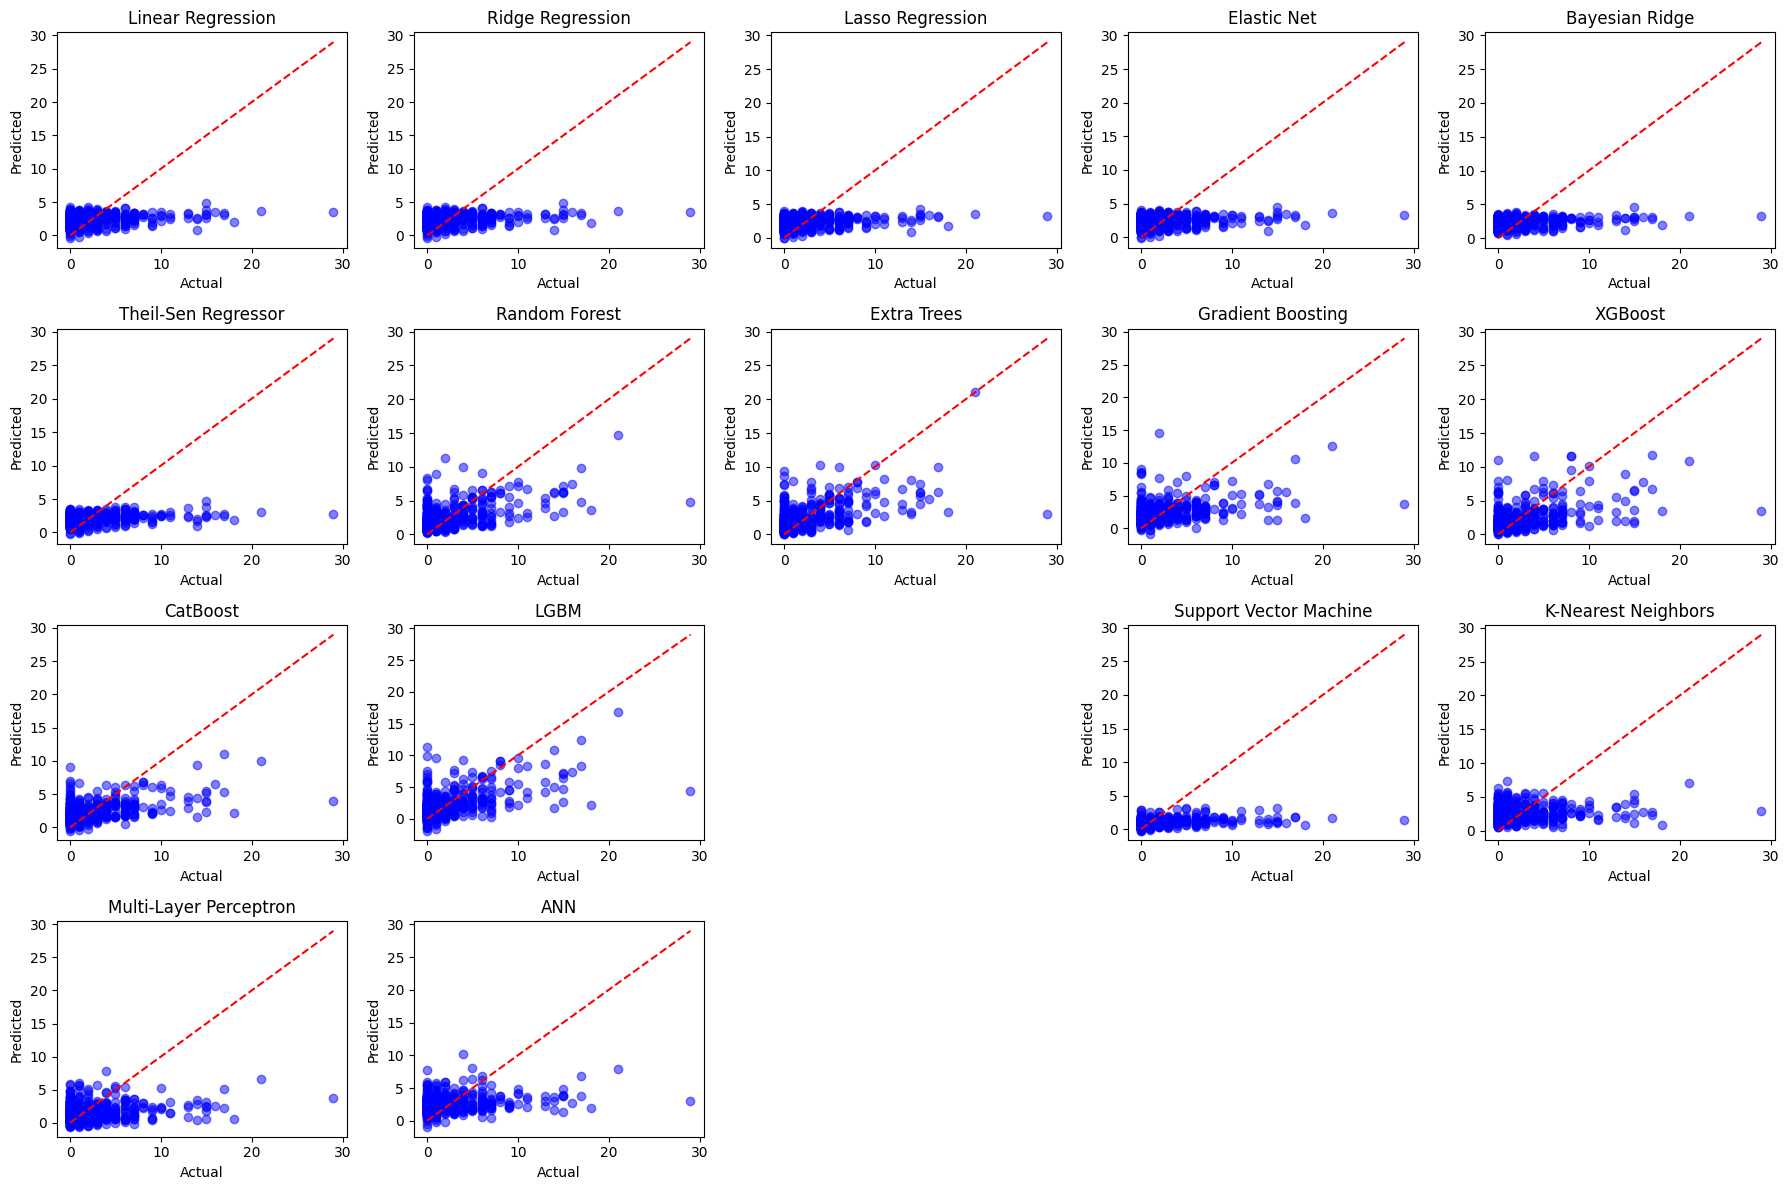

                     Model        MSE      RMSE  R² Score
7              Extra Trees   9.249906  3.041366  0.312342
11                    LGBM   9.361965  3.059733  0.304012
6            Random Forest   9.615373  3.100866  0.285173
9                  XGBoost  10.150475  3.185981  0.245392
10                CatBoost  10.212730  3.195736  0.240764
8        Gradient Boosting  11.328884  3.365841  0.157787
15                     ANN  12.708992  3.564967  0.055186
0        Linear Regression  12.813164  3.579548  0.047442
1         Ridge Regression  12.813428  3.579585  0.047422
5      Theil-Sen Regressor  12.843389  3.583767  0.045195
3              Elastic Net  12.861820  3.586338  0.043825
2         Lasso Regression  12.890951  3.590397  0.041659
4           Bayesian Ridge  12.978919  3.602627  0.035120
13     K-Nearest Neighbors  13.574392  3.684344 -0.009149
14  Multi-Layer Perceptron  13.639159  3.693123 -0.013964
12  Support Vector Machine  14.192997  3.767359 -0.055138


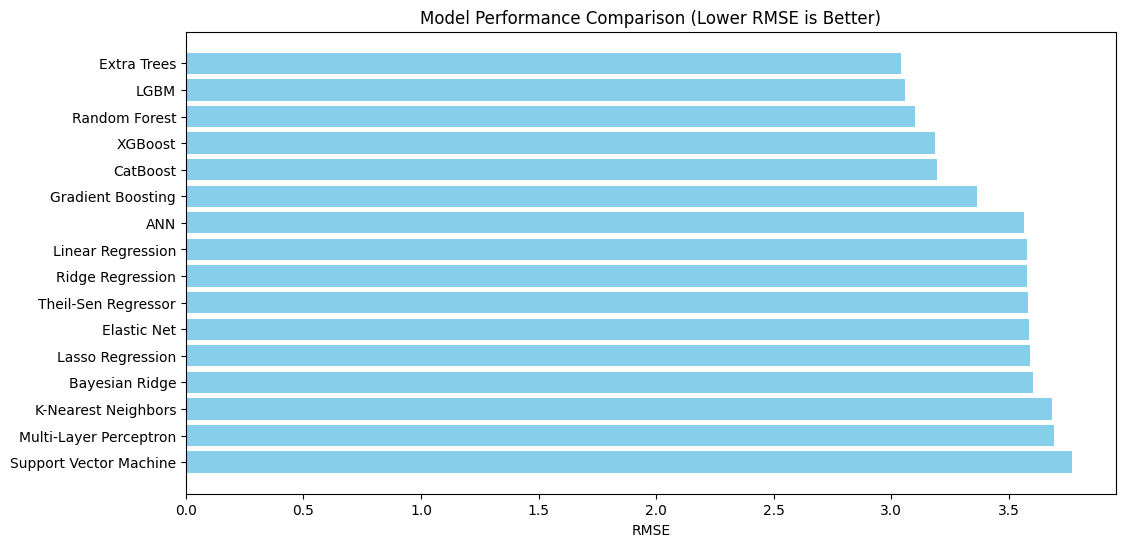

In [899]:
# Run all models together 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, TheilSenRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import optuna

# Load dataset (Replace X, y with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=5000),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000),
    "Bayesian Ridge": BayesianRidge(),
    "Theil-Sen Regressor": TheilSenRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, early_stopping_rounds=10, eval_metric="rmse", random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_seed=42, verbose=0),
    "LGBM":LGBMRegressor(n_estimators=100, random_state=42),
    "Gaussian Process": GaussianProcessRegressor() if len(X_train) < 500 else None,  # Runs only on small datasets
    "Support Vector Machine": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=20),
    "Multi-Layer Perceptron": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    "ANN":MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

# Store model results
results = []

plt.figure(figsize=(18, 12))

for idx, (name, model) in enumerate(models.items(), 1):
    if model is None:
        continue  # Skip Gaussian Process for large datasets

    # Use scaled data for models that require it
    if name in ["Support Vector Machine", "Elastic Net", "Lasso Regression", "Ridge Regression", "MLP"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    elif name == "XGBoost":
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R² Score": r2})

    # Scatter Plot (Actual vs. Predicted)
    plt.subplot(4, 5, idx)
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
    plt.title(f"{name}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

# Display results
print(results_df)

# Bar plot for RMSE comparison
plt.figure(figsize=(12, 6))
plt.barh(results_df["Model"], results_df["RMSE"], color='skyblue')
plt.xlabel("RMSE")
plt.title("Model Performance Comparison (Lower RMSE is Better)")
plt.gca().invert_yaxis()  # Best models on top
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3834
[LightGBM] [Info] Number of data points in the train set: 1905, number of used features: 16
[LightGBM] [Info] Start training from score 2.345932


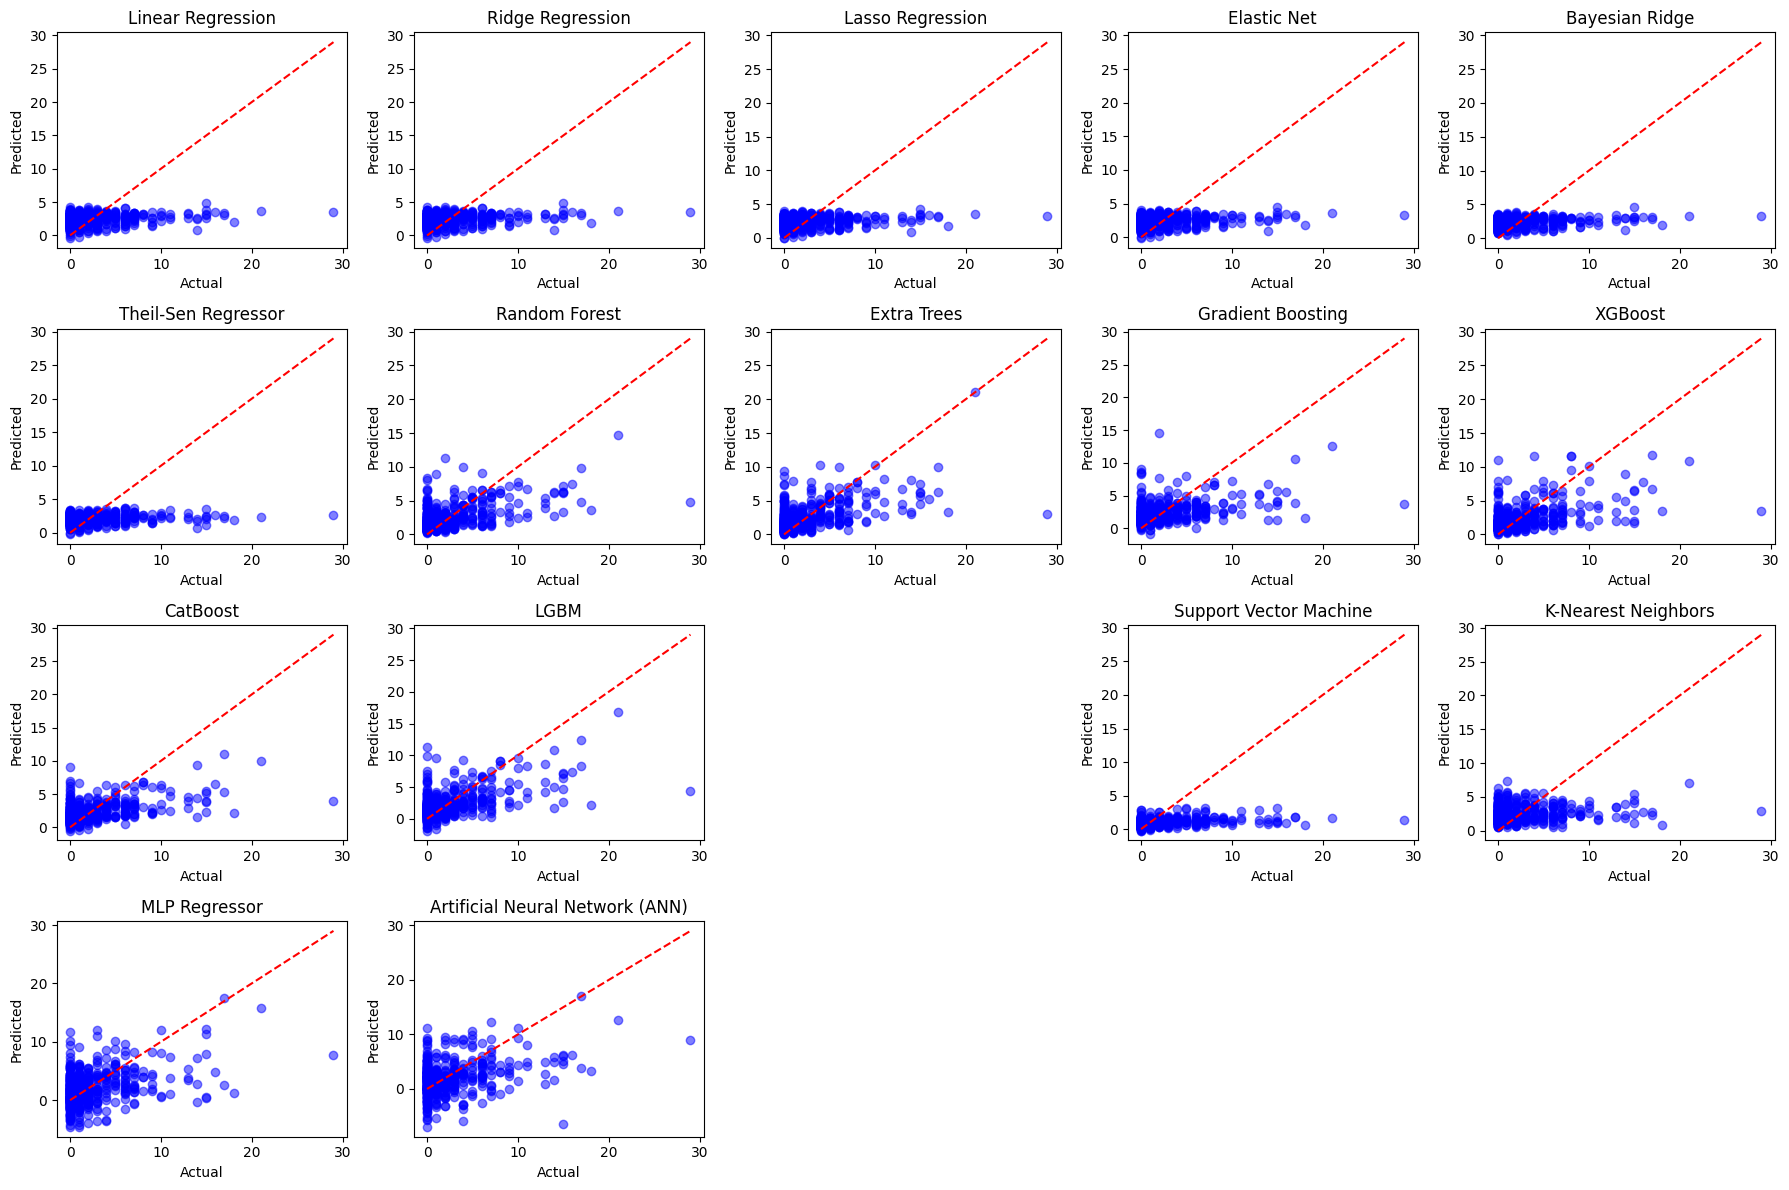

                              Model        MSE      RMSE  R² Score
7                       Extra Trees   9.249906  3.041366  0.312342
11                             LGBM   9.361965  3.059733  0.304012
6                     Random Forest   9.615373  3.100866  0.285173
9                           XGBoost  10.150475  3.185981  0.245392
10                         CatBoost  10.212730  3.195736  0.240764
8                 Gradient Boosting  11.328884  3.365841  0.157787
0                 Linear Regression  12.813164  3.579548  0.047442
1                  Ridge Regression  12.813428  3.579585  0.047422
3                       Elastic Net  12.861820  3.586338  0.043825
2                  Lasso Regression  12.890951  3.590397  0.041659
4                    Bayesian Ridge  12.978919  3.602627  0.035120
5               Theil-Sen Regressor  13.208629  3.634368  0.018042
13              K-Nearest Neighbors  13.574392  3.684344 -0.009149
14                    MLP Regressor  13.911041  3.729751 -0.03

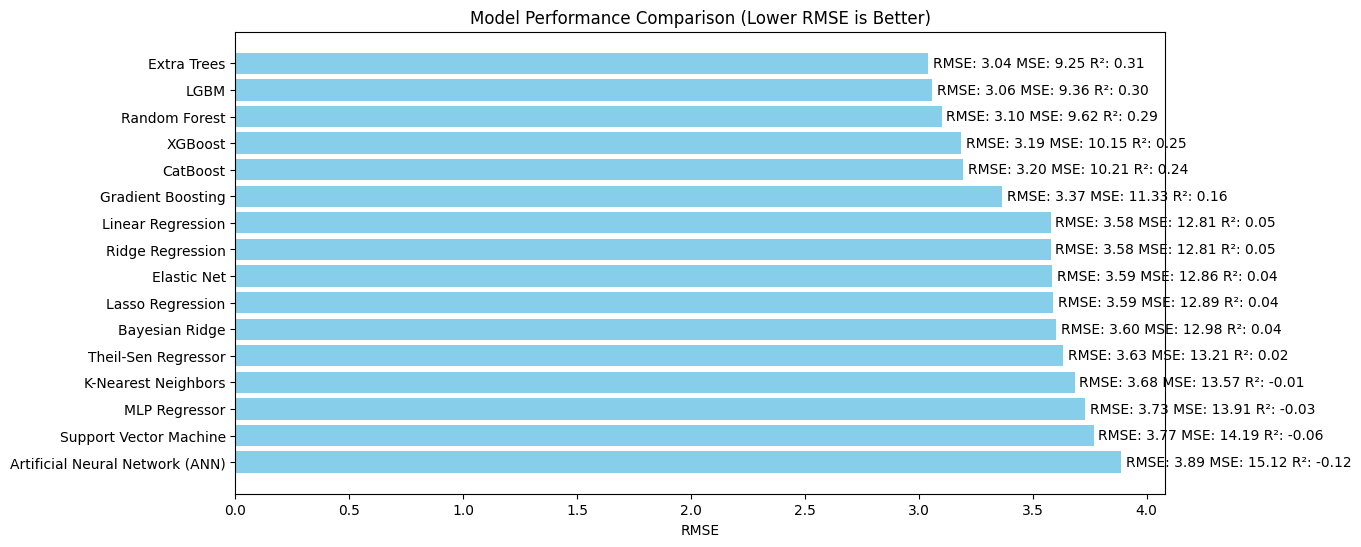

In [900]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, TheilSenRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=5000),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000),
    "Bayesian Ridge": BayesianRidge(),
    "Theil-Sen Regressor": TheilSenRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, early_stopping_rounds=10, eval_metric="rmse", random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_seed=42, verbose=0),
    "LGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Gaussian Process": GaussianProcessRegressor() if len(X_train) < 500 else None,  # Runs only on small datasets
    "Support Vector Machine": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=20),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    "Artificial Neural Network (ANN)": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

# Store model results
results = []

plt.figure(figsize=(18, 12))

for idx, (name, model) in enumerate(models.items(), 1):
    if model is None:
        continue  # Skip Gaussian Process for large datasets

    try:
        # Use scaled data for models that require it
        if name in ["Support Vector Machine", "Elastic Net", "Lasso Regression", "Ridge Regression", "MLP Regressor", "Artificial Neural Network (ANN)"]:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        elif name == "XGBoost":
            model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Evaluate performance
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R² Score": r2})

        # Scatter Plot (Actual vs. Predicted)
        plt.subplot(4, 5, idx)
        plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
        plt.title(f"{name}")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")

    except Exception as e:
        print(f"Error in {name}: {e}")

plt.tight_layout()
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

# Display results
print(results_df)

# Save results to CSV
results_df.to_csv("model_comparison_results.csv", index=False)

# Bar plot for RMSE comparison with MSE and R² labels
plt.figure(figsize=(12, 6))
bars = plt.barh(results_df["Model"], results_df["RMSE"], color='skyblue')

# Add text annotations for MSE, RMSE, and R² at the end of each bar
for bar, (_, row) in zip(bars, results_df.iterrows()):
    plt.text(
        bar.get_width() + 0.02,  # Offset to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f"RMSE: {row['RMSE']:.2f} MSE: {row['MSE']:.2f} R²: {row['R² Score']:.2f}",
        va='center', ha='left', fontsize=10, color='black'
    )

plt.xlabel("RMSE")
plt.title("Model Performance Comparison (Lower RMSE is Better)")
plt.gca().invert_yaxis()  # Best models on top
plt.show()


# Explore individual modles 

## 1️⃣ Linear Regression

In [901]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 12.81316384639786
Root Mean Squared Error: 3.5795479947051776
R-squared Score: 0.04744208855255583


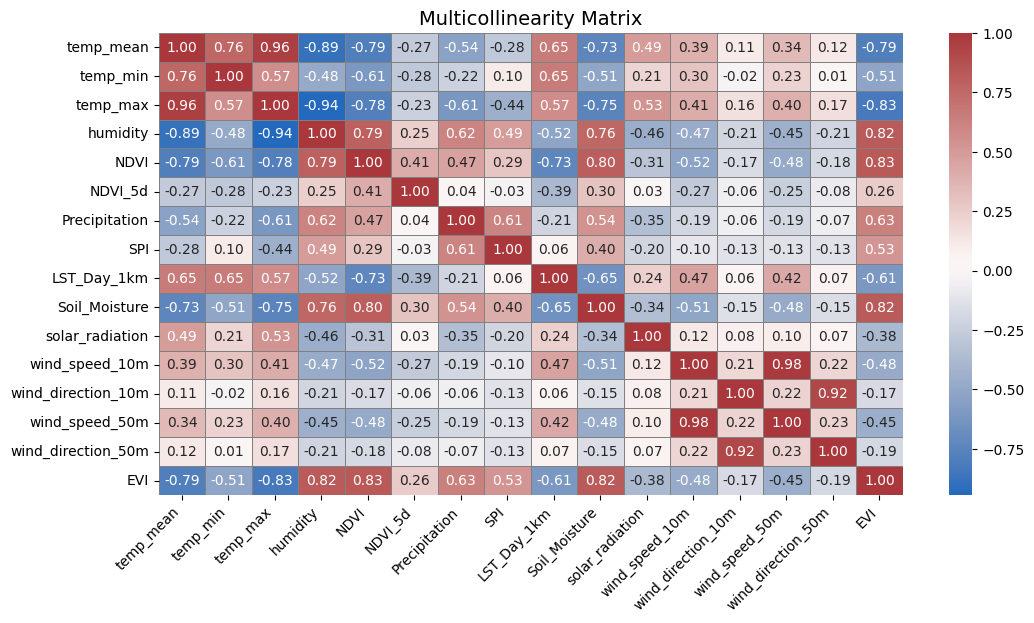

In [902]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = merged_df[features].corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", fmt=".2f", 
            linewidths=0.5, linecolor='gray', annot_kws={"size": 10})

# Title
plt.title("Multicollinearity Matrix", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


# Remove the redenduncies and run the Linear model again

In [903]:
import numpy as np

# Compute the correlation matrix
corr_matrix = merged_df.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold (e.g., 0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop the highly correlated columns
merged_df_linear = merged_df.drop(columns=to_drop)

print("Dropped columns:", to_drop)

print(merged_df_linear.columns)

Dropped columns: ['temp_max', 'humidity', 'wind_speed_50m', 'wind_direction_50m']
Index(['date', 'ka_cases', 'temp_mean', 'temp_min', 'rainfall', 'NDVI',
       'NDVI_5d', 'LST_Day_1km', 'Precipitation', 'SPI', 'Soil_Moisture',
       'solar_radiation', 'wind_speed_10m', 'wind_direction_10m', 'EVI'],
      dtype='object')


In [904]:
# rerun the linear model

# Train Linear Regression model
lr_model_linear = LinearRegression()
lr_model_linear.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model_linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 12.81316384639786
R-squared Score: 0.04744208855255583


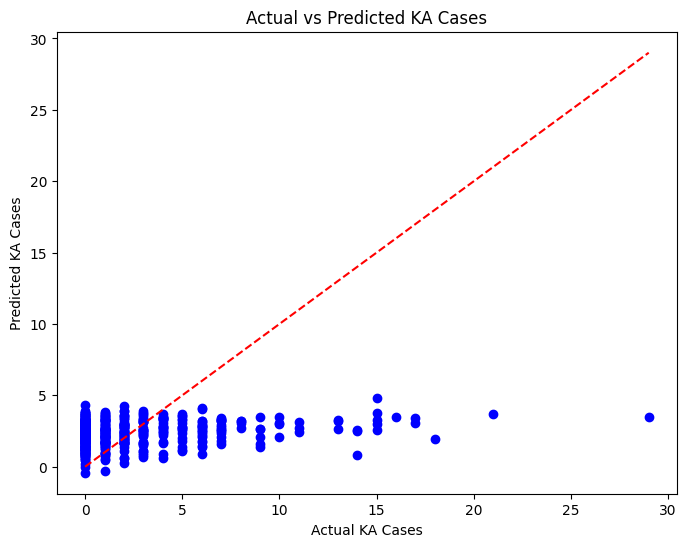

In [905]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual KA Cases")
plt.ylabel("Predicted KA Cases")
plt.title("Actual vs Predicted KA Cases")
plt.show()


### PCA

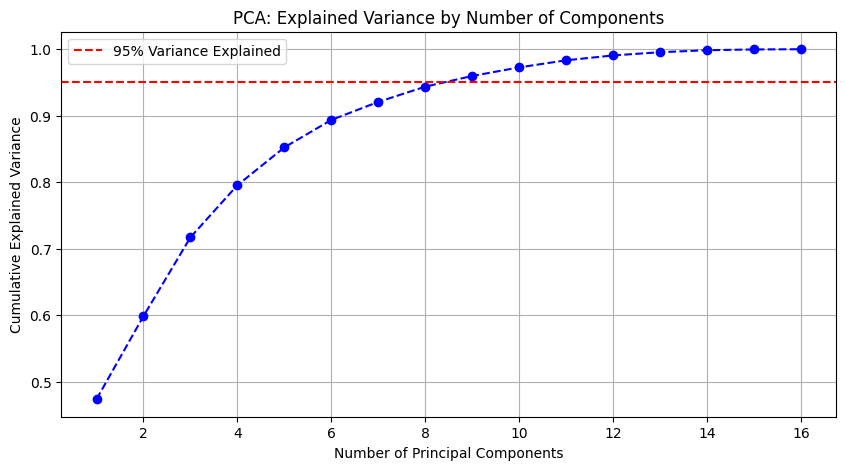


🔹 PCA Component Loadings (Feature Contributions):
                      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10   PC11   PC12   PC13   PC14   PC15   PC16
temp_mean           0.331 -0.149 -0.005 -0.211  0.085 -0.058 -0.307  0.139 -0.076  0.042  0.142 -0.021  0.012  0.280  0.208  0.742
temp_min            0.231 -0.184  0.282 -0.342  0.059 -0.317 -0.359 -0.169  0.592 -0.033 -0.012  0.100  0.030 -0.170 -0.124 -0.218
temp_max            0.336 -0.095 -0.124 -0.087  0.072  0.037 -0.235  0.236 -0.267  0.077  0.169 -0.092 -0.001  0.520 -0.037 -0.593
humidity           -0.333  0.034  0.140 -0.001 -0.013 -0.030  0.227 -0.297  0.373  0.010 -0.072 -0.075  0.045  0.751  0.097  0.043
NDVI               -0.327  0.024 -0.104  0.045  0.137  0.060 -0.218 -0.112  0.127  0.114  0.704 -0.500  0.016 -0.150  0.018 -0.008
NDVI_5d            -0.130 -0.047 -0.324  0.061  0.640 -0.642  0.177  0.091 -0.057  0.010 -0.054  0.066 -0.016  0.003 -0.000  0.002
Precipitation      -0.225  0.123

In [906]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric features
X = merged_df[features]  

# Standardize features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=len(features))  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(features) + 1), explained_variance, marker="o", linestyle="--", color="b")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance by Number of Components")
plt.legend()
plt.grid(True)
plt.show()

# PCA Component Loadings (to understand variable importance)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f"PC{i+1}" for i in range(len(features))], 
                        index=features)

print("\n🔹 PCA Component Loadings (Feature Contributions):")
print(loadings.round(3))


🔹 PCA Loadings Interpretation & Next Steps
Your PCA loadings reveal how much each feature contributes to the principal components (PCs). Here’s how to interpret and proceed:

🔹 Key Observations

## PC1 (Most Important Component)

Strong positive loading: temp_mean (0.355), temp_max (0.355)
Strong negative loading: humidity (-0.349), NDVI (-0.342), soil moisture (-0.342)
🌍 This suggests PC1 captures the inverse relationship between temperature and moisture-related variables (humidity, NDVI, soil moisture).

## PC2 (Second Most Important Component)

Wind-related variables dominate: wind direction at 10m & 50m (0.585, 0.583)
High wind speeds at 10m & 50m (0.309, 0.328)

## 
🌬️ PC2 represents atmospheric movement (wind dynamics), which may influence climate-driven disease transmission.
PC3 & PC4 (Other Significant Components)

SPI (0.531) & Precipitation (0.392) → Related to drought/rainfall
Wind speed (0.520, 0.558) → Reinforces wind's impact
🌧️ These PCs may represent precipitation trends and wind-driven environmental changes.

# Yes, exactly! PC1 seems to represent a "Temperature vs. Moisture" gradient, where:

- Higher PC1 values → Hot & Dry (↑ temp_mean, temp_max, ↓ humidity, NDVI, soil moisture).
- Lower PC1 values → Cool & Moist (↓ temp, ↑ humidity, NDVI, soil moisture).
- 🌍 What Does This Mean for KA Cases?
- If PC1 correlates with KA cases, it suggests disease transmission is linked to a hot, dry climate (which aligns with vector-borne disease patterns).


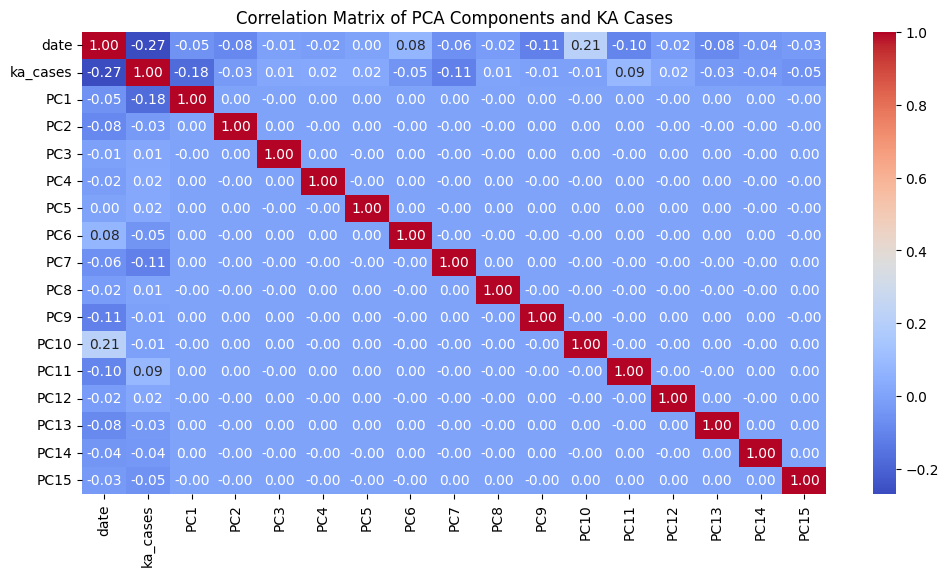

PCA Component Loadings:
                         PC1       PC2       PC3       PC4       PC5       PC6  ...      PC10      PC11      PC12      PC13      PC14      PC15
temp_mean           0.351629 -0.155010 -0.036526 -0.200300  0.070135 -0.079941  ...  0.044596  0.141803  0.011402  0.274394  0.202382  0.745416
temp_min            0.248718 -0.207678  0.254159 -0.340255  0.065497 -0.329696  ... -0.026726 -0.065194  0.038220 -0.174648 -0.123374 -0.217804
temp_max            0.354678 -0.092995 -0.150677 -0.073793  0.051081  0.014161  ...  0.077456  0.192949 -0.010585  0.523020 -0.036087 -0.590116
humidity           -0.351734  0.030424  0.161648 -0.013153  0.010889 -0.003078  ...  0.009770 -0.057981  0.028808  0.758426  0.095883  0.044116
NDVI               -0.344811  0.035115 -0.089327  0.043061  0.141260  0.066210  ...  0.121327  0.851043 -0.012766 -0.126110  0.023946 -0.016853
NDVI_5d            -0.141635 -0.023008 -0.323182  0.068557  0.663061 -0.611927  ...  0.010799 -0.081333 -0.01221

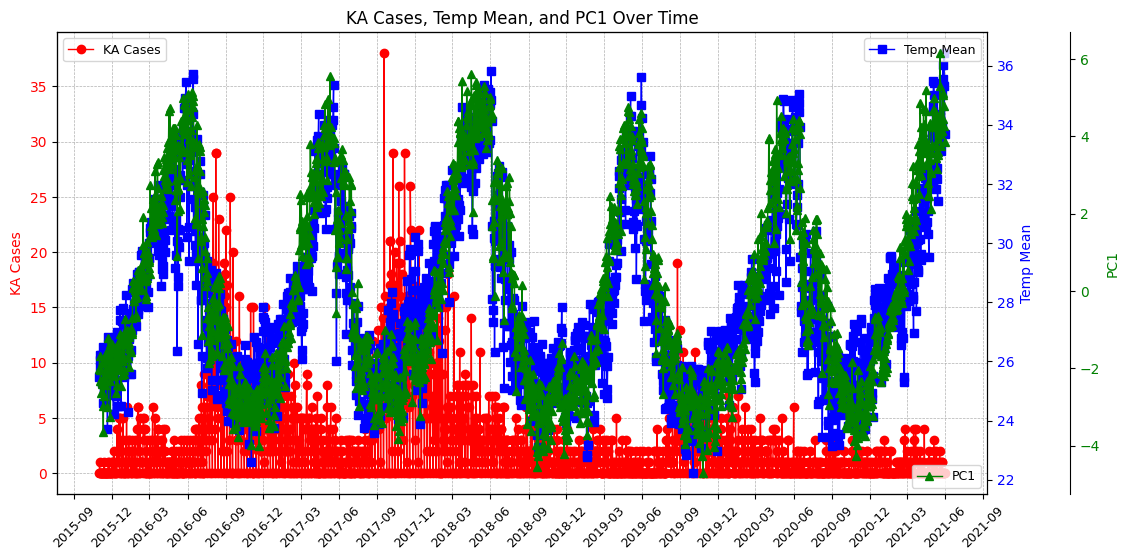

In [907]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates

# Standardize the dataset
features = ["temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d", 
            "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation", 
            "wind_speed_10m", "wind_direction_10m", "wind_speed_50m", "wind_direction_50m"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df[features])

# Apply PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(len(features))])

# Combine with original dataframe
date_col = merged_df["date"]  # Preserve date
ka_cases = merged_df["ka_cases"]  # Preserve KA cases
pca_df.insert(0, "date", date_col)
pca_df.insert(1, "ka_cases", ka_cases)

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pca_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of PCA Components and KA Cases")
plt.show()

# PCA Loadings (Feature Contributions)
pca_loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(len(features))])
print("PCA Component Loadings:")
print(pca_loadings)

# Plot KA cases, temp_mean, and PC1 over time
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(pca_df["date"], pca_df["ka_cases"], label="KA Cases", color="red", marker='o', linestyle='-', linewidth=1)
ax1.set_ylabel("KA Cases", fontsize=10, color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Secondary axis for temp_mean
ax2 = ax1.twinx()
ax2.plot(pca_df["date"], merged_df["temp_mean"], label="Temp Mean", color="blue", marker='s', linestyle='-', linewidth=1)
ax2.set_ylabel("Temp Mean", fontsize=10, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Third axis for PC1
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset for third axis
ax3.plot(pca_df["date"], pca_df["PC1"], label="PC1", color="green", marker='^', linestyle='-', linewidth=1)
ax3.set_ylabel("PC1", fontsize=10, color="green")
ax3.tick_params(axis='y', labelcolor="green")

# Format x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.tick_params(axis='x', rotation=45, labelsize=9)

# Grid and legend
ax1.grid(True, linestyle="--", linewidth=0.5)
ax1.legend(loc="upper left", fontsize=9)
ax2.legend(loc="upper right", fontsize=9)
ax3.legend(loc="lower right", fontsize=9)

# Set title and show plot
plt.title("KA Cases, Temp Mean, and PC1 Over Time")
plt.show()


1️⃣ Add Time-Lagged Analysis

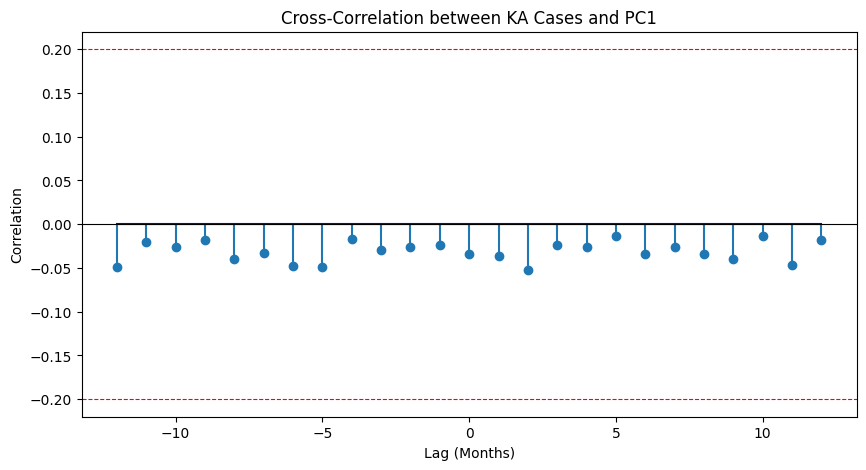

In [908]:
from statsmodels.tsa.stattools import ccf

# Function to compute cross-correlation
def compute_cross_correlation(series1, series2, max_lag=12):
    lags = range(-max_lag, max_lag + 1)
    correlations = [series1.corr(series2.shift(lag)) for lag in lags]
    return lags, correlations

# Choose PC1 and KA cases
pc1_series = pca_df["PC13"]
ka_series = pca_df["ka_cases"]

# Compute cross-correlation
lags, correlations = compute_cross_correlation(ka_series, pc1_series)

# Plot cross-correlation
plt.figure(figsize=(10, 5))
plt.stem(lags, correlations, basefmt="b-")
plt.axhline(y=0, color="black", linewidth=0.8)
plt.axhline(y=0.2, color="red", linestyle="--", linewidth=0.8)  # Threshold
plt.axhline(y=-0.2, color="red", linestyle="--", linewidth=0.8)
plt.xlabel("Lag (Months)")
plt.ylabel("Correlation")
plt.title("Cross-Correlation between KA Cases and PC1")
plt.show()


2️⃣ Check for Seasonal Patterns

<positron-console-cell-909>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



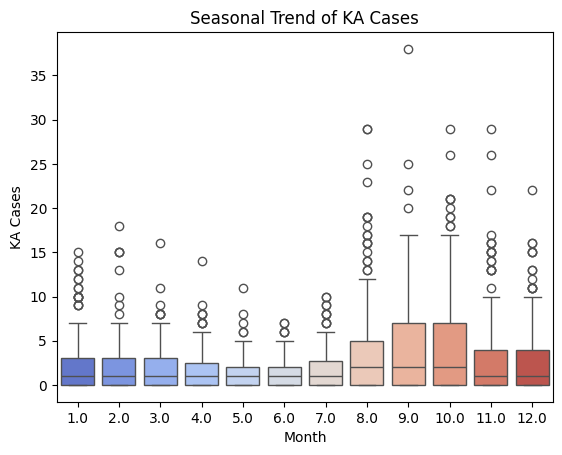

In [909]:
pca_df["month"] = pca_df["date"].dt.month
sns.boxplot(x="month", y="ka_cases", data=pca_df, palette="coolwarm")
plt.title("Seasonal Trend of KA Cases")
plt.xlabel("Month")
plt.ylabel("KA Cases")
plt.show()


1️⃣ Variance Explained by Each PCA Component

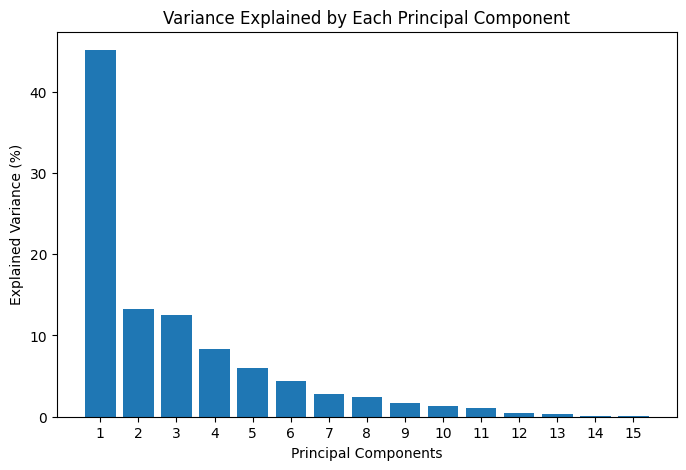

In [910]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(features) + 1), pca.explained_variance_ratio_ * 100)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance (%)")
plt.title("Variance Explained by Each Principal Component")
plt.xticks(range(1, len(features) + 1))
plt.show()


2️⃣ Time-Series of Multiple PCs

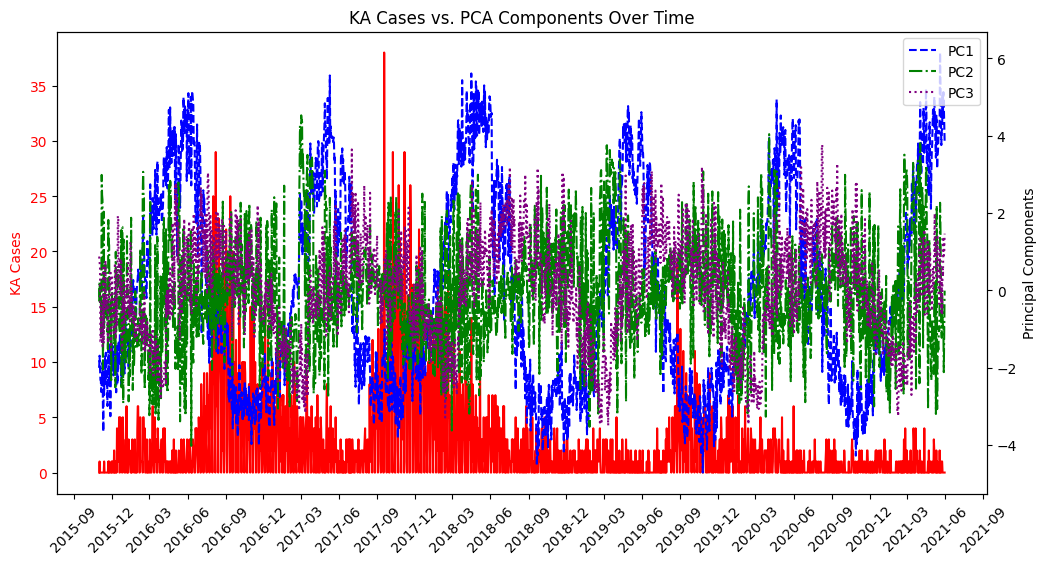

In [911]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(pca_df["date"], pca_df["ka_cases"], label="KA Cases", color="red", linestyle="-")
ax1.set_ylabel("KA Cases", color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Secondary axes for PC1, PC2, PC3
ax2 = ax1.twinx()
ax2.plot(pca_df["date"], pca_df["PC1"], label="PC1", color="blue", linestyle="--")
ax2.plot(pca_df["date"], pca_df["PC2"], label="PC2", color="green", linestyle="-.")
ax2.plot(pca_df["date"], pca_df["PC3"], label="PC3", color="purple", linestyle=":")
ax2.set_ylabel("Principal Components")
ax2.legend(loc="upper right")

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.tick_params(axis='x', rotation=45)

plt.title("KA Cases vs. PCA Components Over Time")
plt.show()


3️⃣ PCA Loadings (How Each Variable Contributes to PCs)

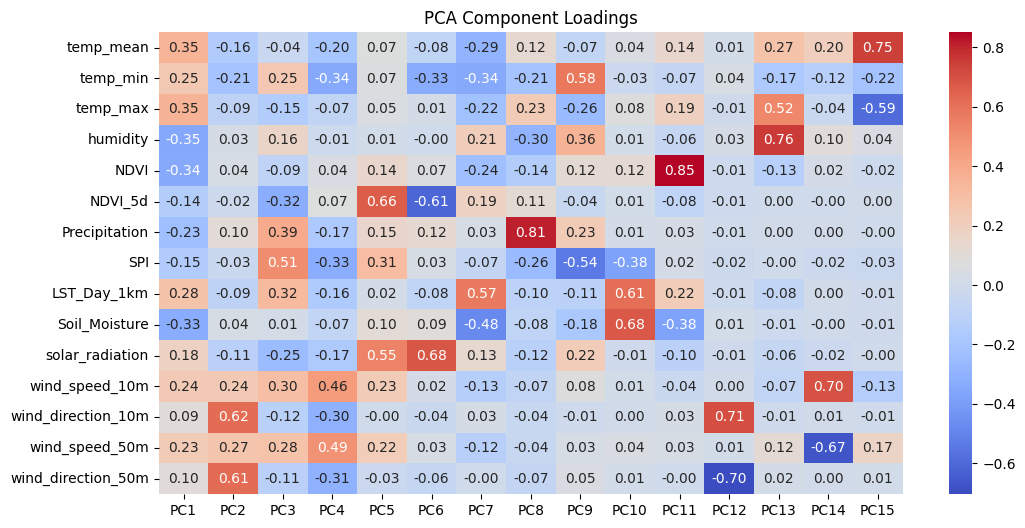

In [912]:
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("PCA Component Loadings")
plt.show()


4️⃣ Scatter Plot of PCs

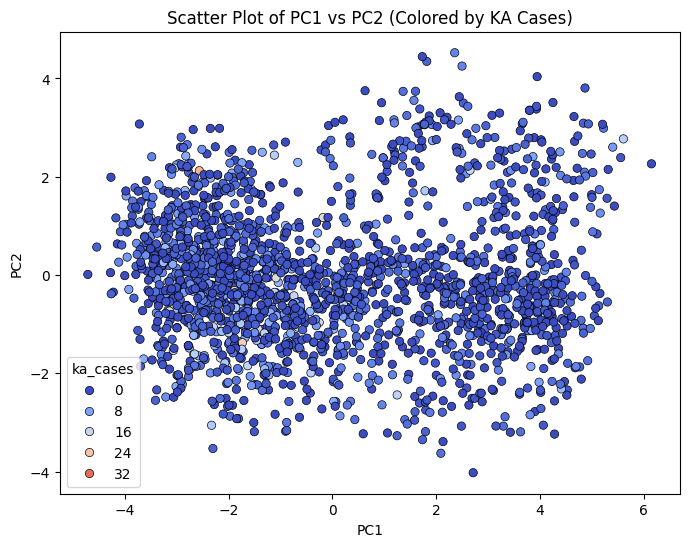

In [913]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["ka_cases"], palette="coolwarm", edgecolor="k")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of PC1 vs PC2 (Colored by KA Cases)")
plt.show()


In [914]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df[features])

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

# Transform data using optimal number of components
pca_optimal = PCA(n_components=optimal_components)
reduced_data = pca_optimal.fit_transform(scaled_data)

# Convert back to DataFrame
columns_pca = [f"PC{i+1}" for i in range(optimal_components)]
reduced_df = pd.DataFrame(reduced_data, columns=columns_pca)

# Add back the date column if necessary
reduced_df["date"] = merged_df["date"]

# Display the first few rows
print(reduced_df.head())


Optimal number of components: 9
        PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9 date
0 -0.891544  2.729237 -0.684939 -0.530297  0.151593 -0.187339 -0.001762 -0.770523 -0.248606  NaT
1 -1.591073 -0.463568 -1.042300 -0.658250  0.312526  0.531937  0.203439 -0.651318  0.061246  NaT
2 -1.828972 -0.427817 -0.808928 -0.534913  0.017818  0.071053 -0.012837 -0.719480  0.238631  NaT
3 -1.909077 -0.390041 -0.477747 -0.044893 -0.420896 -0.498705 -0.038148 -0.574970  0.006218  NaT
4 -2.213504 -0.127168 -0.460349 -0.087062 -0.254501 -0.227033  0.293291 -0.894348  0.382262  NaT


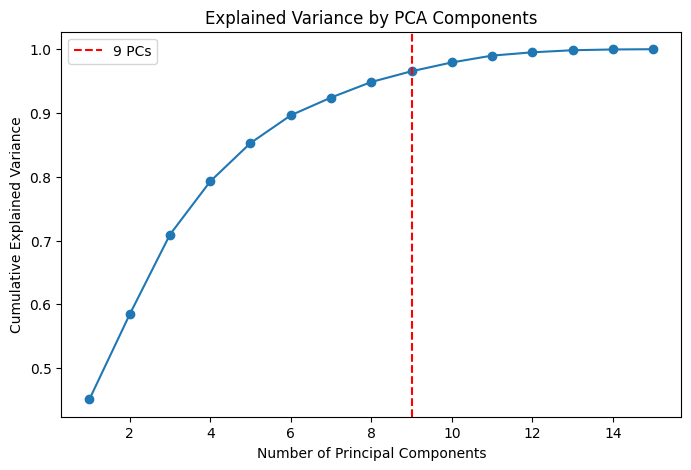

In [915]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.axvline(optimal_components, color='r', linestyle="--", label=f"{optimal_components} PCs")
plt.legend()
plt.show()


In [916]:
pca_loadings = pd.DataFrame(pca_optimal.components_.T, index=features, columns=columns_pca)
print(pca_loadings)


                         PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9
temp_mean           0.351629 -0.155010 -0.036526 -0.200300  0.070135 -0.079941 -0.292999  0.121943 -0.068736
temp_min            0.248718 -0.207678  0.254159 -0.340255  0.065497 -0.329696 -0.344904 -0.206409  0.583523
temp_max            0.354678 -0.092995 -0.150677 -0.073793  0.051081  0.014161 -0.223928  0.228580 -0.256465
humidity           -0.351734  0.030424  0.161648 -0.013153  0.010889 -0.003078  0.211010 -0.295215  0.355825
NDVI               -0.344811  0.035115 -0.089327  0.043061  0.141260  0.066210 -0.236197 -0.141876  0.117745
NDVI_5d            -0.141635 -0.023008 -0.323182  0.068557  0.663061 -0.611927  0.186223  0.112316 -0.044461
Precipitation      -0.232993  0.101511  0.393133 -0.171696  0.149639  0.124280  0.032022  0.812142  0.227886
SPI                -0.151956 -0.034347  0.510263 -0.327907  0.312034  0.030733 -0.066393 -0.258360 -0.540609
LST_Day_1km        

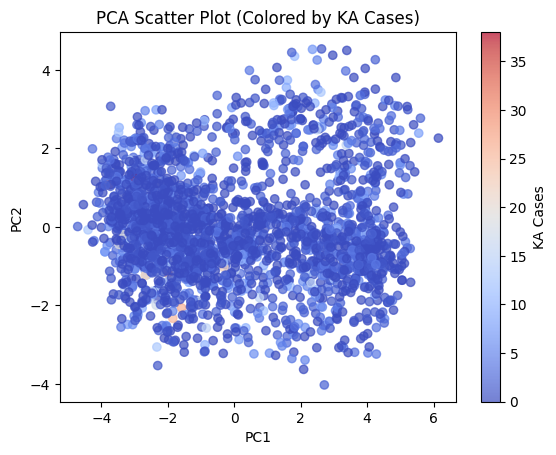

In [917]:
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], c=merged_df["ka_cases"], cmap="coolwarm", alpha=0.7)
plt.colorbar(label="KA Cases")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (Colored by KA Cases)")
plt.show()


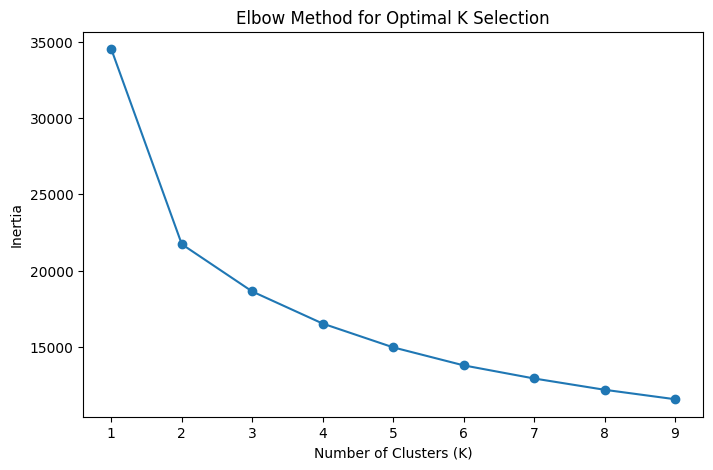

In [918]:
# Clustering Analysis

from sklearn.cluster import KMeans

# Choose number of clusters using the Elbow Method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K Selection")
plt.show()



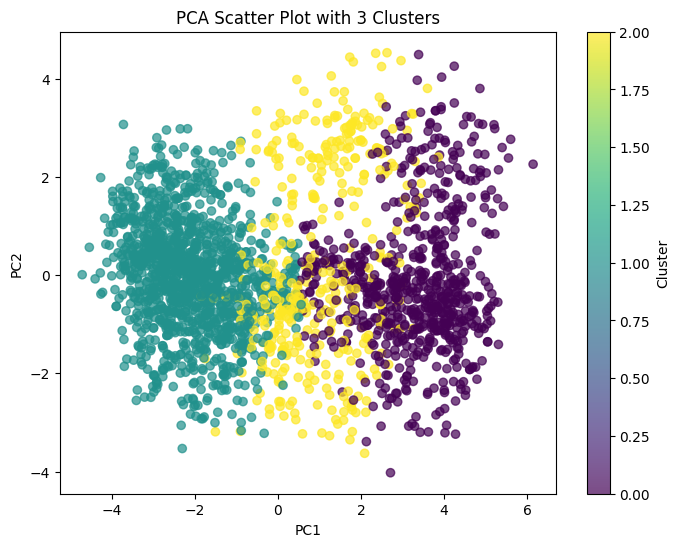

In [919]:
# Apply K-Means with optimal K

optimal_k = 3  # Replace this with the best K from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced_data)

# Add clusters to DataFrame
reduced_df["Cluster"] = clusters

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], c=reduced_df["Cluster"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"PCA Scatter Plot with {optimal_k} Clusters")
plt.show()


In [920]:
# Check Loadings (Feature Contributions)

pca_loadings = pd.DataFrame(
    pca_optimal.components_.T, 
    index=features, 
    columns=[f"PC{i+1}" for i in range(optimal_components)]
)

# Display top contributing features per principal component
for i in range(optimal_components):
    print(f"\nTop 5 Features Contributing to PC{i+1}:")
    print(pca_loadings.iloc[:, i].abs().sort_values(ascending=False).head(5))



Top 5 Features Contributing to PC1:
temp_max         0.354678
humidity         0.351734
temp_mean        0.351629
NDVI             0.344811
Soil_Moisture    0.333725
Name: PC1, dtype: float64

Top 5 Features Contributing to PC2:
wind_direction_10m    0.616638
wind_direction_50m    0.614539
wind_speed_50m        0.266693
wind_speed_10m        0.242073
temp_min              0.207678
Name: PC2, dtype: float64

Top 5 Features Contributing to PC3:
SPI               0.510263
Precipitation     0.393133
NDVI_5d           0.323182
LST_Day_1km       0.321595
wind_speed_10m    0.298482
Name: PC3, dtype: float64

Top 5 Features Contributing to PC4:
wind_speed_50m        0.492471
wind_speed_10m        0.455280
temp_min              0.340255
SPI                   0.327907
wind_direction_50m    0.305319
Name: PC4, dtype: float64

Top 5 Features Contributing to PC5:
NDVI_5d            0.663061
solar_radiation    0.546584
SPI                0.312034
wind_speed_10m     0.226041
wind_speed_50m     0.216

## Lasso Regression

In [921]:
from sklearn.linear_model import Lasso

# Feature selection
features = ["temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d", "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation", "wind_speed_10m", "wind_direction_10m","wind_speed_50m", "wind_direction_50m","EVI"]
X = merged_df[features]
y = merged_df["ka_cases"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Lasso Regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)

# Get feature importance
lasso_coef = pd.Series(lasso.coef_, index=features)

# Print important features
print("Lasso Feature Importance:")
print(lasso_coef[lasso_coef != 0].sort_values(ascending=False))


# 🛠️ If many coefficients are zero:
# Drop unimportant features before training more models.

Lasso Feature Importance:
solar_radiation       0.184137
Soil_Moisture         0.042645
SPI                   0.034822
wind_direction_10m    0.002063
wind_direction_50m   -0.003758
temp_min             -0.004756
Precipitation        -0.013579
humidity             -0.030723
LST_Day_1km          -0.084483
temp_max             -0.114259
dtype: float64


In [922]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print(f"Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso Regression R² Score: {r2_score(y_test, y_pred_lasso)}")


Lasso Regression MSE: 12.971556763672043
Lasso Regression R² Score: 0.03566682146977518


##  Ridge regression


In [923]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define and fit Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Model Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression RMSE: {rmse_ridge}')
print(f'Ridge Regression R² Score: {r2_ridge}')

# Feature Importance
ridge_coeffs = pd.Series(ridge.coef_, index=X_train.columns)
print("Ridge Feature Importance:")
print(ridge_coeffs.sort_values(ascending=False))


Ridge Regression MSE: 12.820873903357132
Ridge Regression RMSE: 3.5806247923172756
Ridge Regression R² Score: 0.04686890648430886
Ridge Feature Importance:
NDVI_5d               0.774544
wind_speed_50m        0.727434
temp_mean             0.428962
solar_radiation       0.292029
EVI                   0.253099
SPI                   0.052034
Soil_Moisture         0.046332
wind_direction_10m    0.001587
wind_direction_50m   -0.003421
Precipitation        -0.016152
humidity             -0.037638
LST_Day_1km          -0.088042
temp_min             -0.218730
temp_max             -0.401502
wind_speed_10m       -0.950728
NDVI                 -1.545891
dtype: float64


In [924]:
# cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Perform 5-fold cross-validation
cv_mse = -cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)
cv_r2 = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print results
print(f'Cross-Validated MSE: {cv_mse.mean():.4f}')
print(f'Cross-Validated RMSE: {cv_rmse.mean():.4f}')
print(f'Cross-Validated R² Score: {cv_r2.mean():.4f}')


Cross-Validated MSE: 17.6304
Cross-Validated RMSE: 3.8788
Cross-Validated R² Score: -1.9766


In [925]:
# Hyper parameter tunning 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np

# Define the parameter grid (adjust alpha range as needed)
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Initialize Ridge Regression
ridge = Ridge()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Best Alpha: {best_alpha}")
print(f"Tuned Ridge Regression MSE: {mse}")
print(f"Tuned Ridge Regression RMSE: {rmse}")
print(f"Tuned Ridge Regression R² Score: {r2}")


Best Alpha: 719.6856730011514
Tuned Ridge Regression MSE: 12.960937889742844
Tuned Ridge Regression RMSE: 3.6001302601076595
Tuned Ridge Regression R² Score: 0.03645625119167528


## Elastic net 

In [926]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the ElasticNet model with cross-validation for hyperparameter tuning
elastic_net = ElasticNetCV(l1_ratio=np.linspace(0.1, 1, 10), alphas=np.logspace(-3, 3, 10), cv=5)

# Fit the model
elastic_net.fit(X_train, y_train)

# Predictions
y_pred = elastic_net.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Cross-validation performance
cv_mse = -cross_val_score(elastic_net, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
cv_rmse = np.sqrt(cv_mse)
cv_r2 = cross_val_score(elastic_net, X_train, y_train, scoring='r2', cv=5).mean()

# Print results
print(f"Best Alpha: {elastic_net.alpha_}")
print(f"Best L1 Ratio: {elastic_net.l1_ratio_}")
print(f"ElasticNet Regression MSE: {mse}")
print(f"ElasticNet Regression RMSE: {rmse}")
print(f"ElasticNet Regression R² Score: {r2}")
print(f"Cross-Validated MSE: {cv_mse}")
print(f"Cross-Validated RMSE: {cv_rmse}")
print(f"Cross-Validated R² Score: {cv_r2}")


Best Alpha: 0.1
Best L1 Ratio: 0.6
ElasticNet Regression MSE: 12.972413434518163
ElasticNet Regression RMSE: 3.6017236754806947
ElasticNet Regression R² Score: 0.03560313473309085
Cross-Validated MSE: 15.401736147235578
Cross-Validated RMSE: 3.924504573476196
Cross-Validated R² Score: 0.02760882718084423


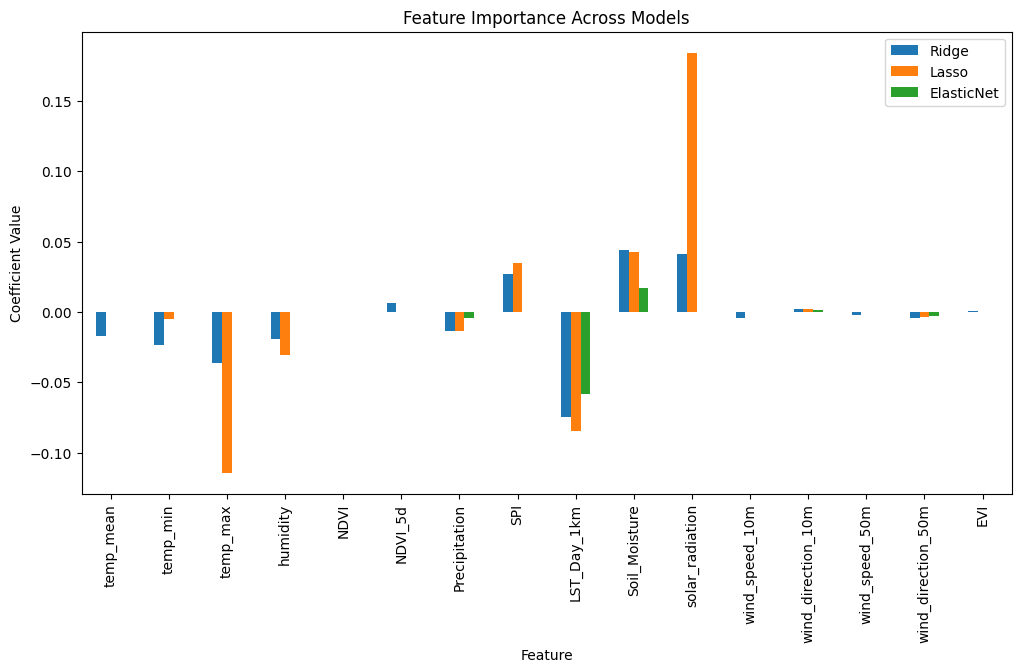

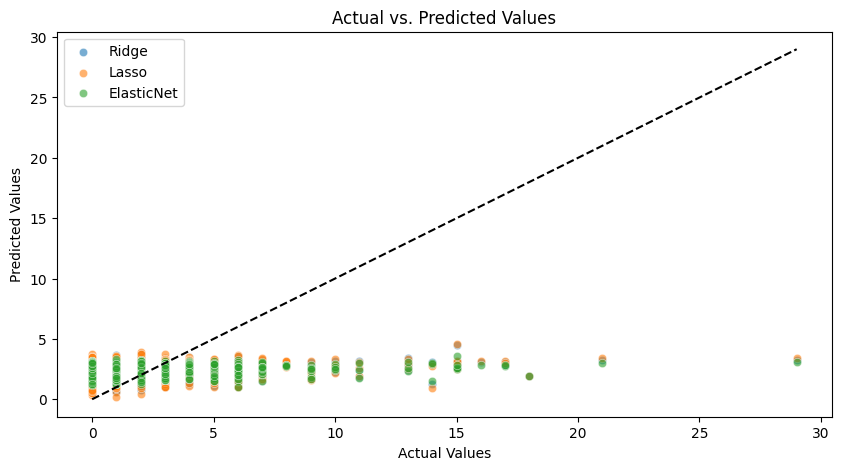

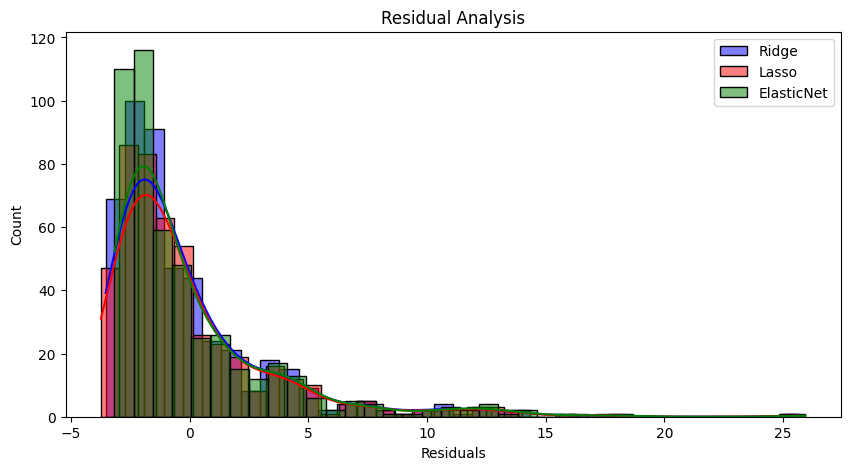

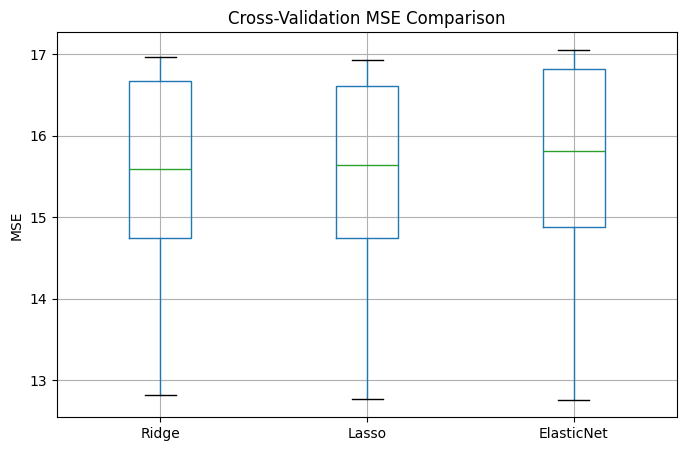

Stacking Ensemble MSE: 13.451855402886208
Stacking Ensemble RMSE: 3.667677112681296
Stacking Ensemble R² Score: -3.960312023854051e-05
Voting Ensemble MSE: 13.003011877530533
Voting Ensemble RMSE: 3.6059689235392107
Voting Ensemble R² Score: 0.03332838125933424


In [927]:

# Plot feature importance for Ridge, Lasso, and ElasticNet.
# Plot actual vs. predicted values to assess model fit.
# Visualize residuals to check for patterns.
# Compare cross-validation errors using boxplots.
# Implement a voting/stacking ensemble of Ridge, Lasso, and ElasticNet.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Fit models
ridge = Ridge(alpha=10000).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
elasticnet = ElasticNet(alpha=10, l1_ratio=0.1).fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elasticnet.coef_
})

feature_importance.set_index('Feature', inplace=True)
feature_importance.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance Across Models')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Predictions
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
elastic_pred = elasticnet.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=ridge_pred, label='Ridge', alpha=0.6)
sns.scatterplot(x=y_test, y=lasso_pred, label='Lasso', alpha=0.6)
sns.scatterplot(x=y_test, y=elastic_pred, label='ElasticNet', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# Residuals
plt.figure(figsize=(10, 5))
sns.histplot(y_test - ridge_pred, kde=True, label='Ridge', color='blue', alpha=0.5)
sns.histplot(y_test - lasso_pred, kde=True, label='Lasso', color='red', alpha=0.5)
sns.histplot(y_test - elastic_pred, kde=True, label='ElasticNet', color='green', alpha=0.5)
plt.xlabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Cross-validation error comparison
cv_scores = {
    'Ridge': -cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error'),
    'Lasso': -cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error'),
    'ElasticNet': -cross_val_score(elasticnet, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
}

cv_df = pd.DataFrame(cv_scores)
cv_df.boxplot(figsize=(8, 5))
plt.title('Cross-Validation MSE Comparison')
plt.ylabel('MSE')
plt.show()

# Stacking Ensemble
stacking_model = StackingRegressor(
    estimators=[('ridge', ridge), ('lasso', lasso), ('elasticnet', elasticnet)],
    final_estimator=Lasso()
)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print(f"Stacking Ensemble MSE: {mean_squared_error(y_test, stacking_pred)}")
print(f"Stacking Ensemble RMSE: {np.sqrt(mean_squared_error(y_test, stacking_pred))}")
print(f"Stacking Ensemble R² Score: {r2_score(y_test, stacking_pred)}")

# Voting Ensemble
voting_model = VotingRegressor([('ridge', ridge), ('lasso', lasso), ('elasticnet', elasticnet)])
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
print(f"Voting Ensemble MSE: {mean_squared_error(y_test, voting_pred)}")
print(f"Voting Ensemble RMSE: {np.sqrt(mean_squared_error(y_test, voting_pred))}")
print(f"Voting Ensemble R² Score: {r2_score(y_test, voting_pred)}")


# Tune the best modles  

For further tuning, you should focus on the top-performing models based on MSE, RMSE, and R² score. The best candidates are:

Extra Trees (MSE: 9.25, RMSE: 3.04, R²: 0.312)
LGBM (LightGBM) (MSE: 9.36, RMSE: 3.06, R²: 0.304)
Random Forest (MSE: 9.62, RMSE: 3.10, R²: 0.285)
XGBoost (MSE: 10.15, RMSE: 3.19, R²: 0.245)


# Extra tree model 

In [928]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import optuna
import joblib

# Ensure X and y are defined
assert 'X' in globals() and 'y' in globals(), "X and y must be defined before running this script"

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define Optuna objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 300, 500, 1000]),
        "max_depth": trial.suggest_categorical("max_depth", [None, 10, 20, 30]),
        "min_samples_split": trial.suggest_categorical("min_samples_split", [2, 5, 10]),
        "min_samples_leaf": trial.suggest_categorical("min_samples_leaf", [1, 2, 4]),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }
    
    model = ExtraTreesRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_val)
    return mean_squared_error(y_val, preds)

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, n_jobs=-1)  # Reduce trials for efficiency

# Print best parameters
best_params = study.best_trial.params
print(f"Best Hyperparameters: {best_params}")

# Train the best model on the full training set
best_model = ExtraTreesRegressor(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)

# Cross-validation for robust performance
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
mean_cv_mse = -np.mean(cv_scores)

# Make final predictions
final_preds = best_model.predict(X_test)

# Evaluate the final model
mse = mean_squared_error(y_test, final_preds)
r2 = r2_score(y_test, final_preds)

print(f"Cross-validated MSE: {mean_cv_mse:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")

# Extract and display feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))



[I 2025-03-20 01:04:54,464] A new study created in memory with name: no-name-b82f8da3-74e0-4d6e-81db-0d197f763f77
[I 2025-03-20 01:04:55,485] Trial 3 finished with value: 9.725851712100475 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}. Best is trial 3 with value: 9.725851712100475.
[I 2025-03-20 01:04:55,876] Trial 5 finished with value: 7.633611005047954 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 5 with value: 7.633611005047954.
[I 2025-03-20 01:04:56,105] Trial 7 finished with value: 10.007387409487718 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 5 with value: 7.633611005047954.
[I 2025-03-20 01:04:56,571] Trial 6 finished with value: 7.719543132108486 and 

Best Hyperparameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}
Cross-validated MSE: 13.1424
Test MSE: 9.7188
Test R² Score: 0.2775

Top 10 Feature Importances:
               Feature  Importance
9        Soil_Moisture    0.081470
15                 EVI    0.079058
5              NDVI_5d    0.068212
3             humidity    0.067725
8          LST_Day_1km    0.065918
4                 NDVI    0.064791
14  wind_direction_50m    0.062754
1             temp_min    0.062734
12  wind_direction_10m    0.060925
7                  SPI    0.058500


In [929]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
import optuna
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Select only the top 10 features based on importance
top_features = ["EVI", "Soil_Moisture", "LST_Day_1km", "NDVI", "NDVI_5d", 
                "humidity", "SPI", "wind_direction_50m", "solar_radiation", "temp_max"]
X = X[top_features]  # Keep only important features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Optuna objective function for Extra Trees tuning
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 1500, step=250),
        "max_depth": trial.suggest_int("max_depth", 10, 50, step=10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
    }
    
    model = ExtraTreesRegressor(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    return -np.mean(scores)  # Minimize MSE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, n_jobs=2)

# Best hyperparameters
best_params = study.best_trial.params
print(f"Best Hyperparameters: {best_params}")

# Train the best model
best_model = ExtraTreesRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate on test set
final_preds = best_model.predict(X_test)
mse = mean_squared_error(y_test, final_preds)
r2 = r2_score(y_test, final_preds)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")

# Save the model
joblib.dump(best_model, "best_extratrees_model.pkl")
print("Best Extra Trees model saved as best_extratrees_model.pkl")


[I 2025-03-20 01:05:11,940] A new study created in memory with name: no-name-8fe6a9a0-cc69-4908-9960-6351ac675730
[I 2025-03-20 01:05:15,554] Trial 1 finished with value: 11.985240523436678 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 11.985240523436678.
[I 2025-03-20 01:05:17,395] Trial 0 finished with value: 10.701283250017879 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 10.701283250017879.
[I 2025-03-20 01:05:18,594] Trial 2 finished with value: 11.475035876575863 and parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 10.701283250017879.
[I 2025-03-20 01:05:25,648] Trial 3 finished with value: 12.706355905102196 an

Best Hyperparameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}
Test MSE: 8.9193
Test R² Score: 0.3369
Best Extra Trees model saved as best_extratrees_model.pkl


1️⃣ Feature Transformation & Interaction
 🔹 Polynomial Features – Capture non-linear relationships.
 🔹 Feature Interactions – Combine features that make sense (e.g., temp_max * humidity). 
2️⃣ Handling Skewed Features
3️⃣ Feature Selection (Reduce Noise)
4️⃣ Temporal Features (If Applicable)
5️⃣ Clustering for New Features
6️⃣ Principal Component Analysis (PCA)

Feature enginering 

In [930]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For saving the model

# 🔹 Step 1: Load and Split Data
features = [
    "temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d",
    "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation",
    "wind_speed_10m", "wind_direction_10m", "wind_speed_50m", "wind_direction_50m", "EVI"
]
X = merged_df[features]
y = merged_df["ka_cases"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 2: Generate Polynomial Features & Display
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Convert to DataFrame
poly_feature_names = poly.get_feature_names_out(X_train.columns)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_feature_names)

print("🔹 Polynomial Features Generated:")
print(X_train_poly.head())

# 🔹 Step 3: Feature Selection using Extra Trees
selector = SelectFromModel(ExtraTreesRegressor(n_estimators=750, random_state=42), threshold='median')
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

selected_features = X_train_poly.columns[selector.get_support()]
print("\n🔹 Selected Features After Extra Trees:")
print(selected_features)

# 🔹 Step 4: Train Extra Trees Model
model = ExtraTreesRegressor(
    n_estimators=750, max_depth=30, min_samples_split=3, 
    min_samples_leaf=1, max_features='sqrt', bootstrap=False, random_state=42
)
model.fit(X_train_selected, y_train)

# 🔹 Step 5: Evaluate Model
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🔹 Model Performance:")
print(f"✅ Test MSE: {mse:.4f}")
print(f"✅ Test R² Score: {r2:.4f}")



🔹 Polynomial Features Generated:
   temp_mean  temp_min  temp_max  humidity  ...  wind_direction_10m EVI  wind_speed_50m wind_direction_50m  wind_speed_50m EVI  wind_direction_50m EVI
0      32.15     22.71     41.56     23.04  ...               32.005365                            654.890            0.833574               29.524028
1      25.93     21.61     30.06     78.80  ...               82.218777                            117.012            0.862681               26.276558
2      31.97     24.99     40.82     30.10  ...               67.688921                           1014.258            0.558079               68.719519
3      24.41     22.10     27.65     86.63  ...               73.695500                            477.040            1.123458               74.617742
4      26.66     21.97     30.61     76.06  ...               70.599803                            258.900            0.560909               64.541981

[5 rows x 136 columns]

🔹 Selected Features After Extra Tree

In [931]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # Save Model

# 🔹 Step 1: Load Data
features = [
    "temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d",
    "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation",
    "wind_speed_10m", "wind_direction_10m", "wind_speed_50m", "wind_direction_50m", "EVI"
]
X = merged_df[features]
y = merged_df["ka_cases"]

# 🔹 Step 2: Identify Skewed Features (Skewness > 0.75)
skewed_features = X.skew()[X.skew().abs() > 0.75].index.tolist()
print(f"🔹 Skewed Features: {skewed_features}")

# 🔹 Step 3: Apply Transformations
for feature in skewed_features:
    if (X[feature] > 0).all():  # Use Box-Cox if all values are positive
        X[feature], _ = boxcox(X[feature] + 1)  # Shift to avoid zero issues
    else:  # Use Log Transformation if zeros are present
        X[feature] = np.log1p(X[feature])

# 🔹 Step 4: Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# 🔹 Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 6: Feature Selection using Extra Trees
selector = SelectFromModel(ExtraTreesRegressor(n_estimators=750, random_state=42), threshold='median')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print("\n🔹 Selected Features After Extra Trees:")
print(selected_features)

# 🔹 Step 7: Train Extra Trees Model
model = ExtraTreesRegressor(
    n_estimators=750, max_depth=30, min_samples_split=3, 
    min_samples_leaf=1, max_features='sqrt', bootstrap=False, random_state=42
)
model.fit(X_train_selected, y_train)

# 🔹 Step 8: Evaluate Model
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🔹 Model Performance:")
print(f"✅ Test MSE: {mse:.4f}")
print(f"✅ Test R² Score: {r2:.4f}")



🔹 Skewed Features: ['temp_min', 'Precipitation', 'SPI', 'solar_radiation', 'wind_speed_10m']


<positron-console-cell-931>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-931>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



🔹 Selected Features After Extra Trees:
Index(['humidity', 'NDVI', 'NDVI_5d', 'LST_Day_1km', 'Soil_Moisture',
       'solar_radiation', 'wind_direction_50m', 'EVI'],
      dtype='object')

🔹 Model Performance:
✅ Test MSE: 9.1298
✅ Test R² Score: 0.3213


/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



🔹 Selected Features After Extra Trees:
Index(['temp_min', 'humidity', 'NDVI', 'NDVI_5d', 'LST_Day_1km',
       'Soil_Moisture', 'solar_radiation', 'EVI'],
      dtype='object')


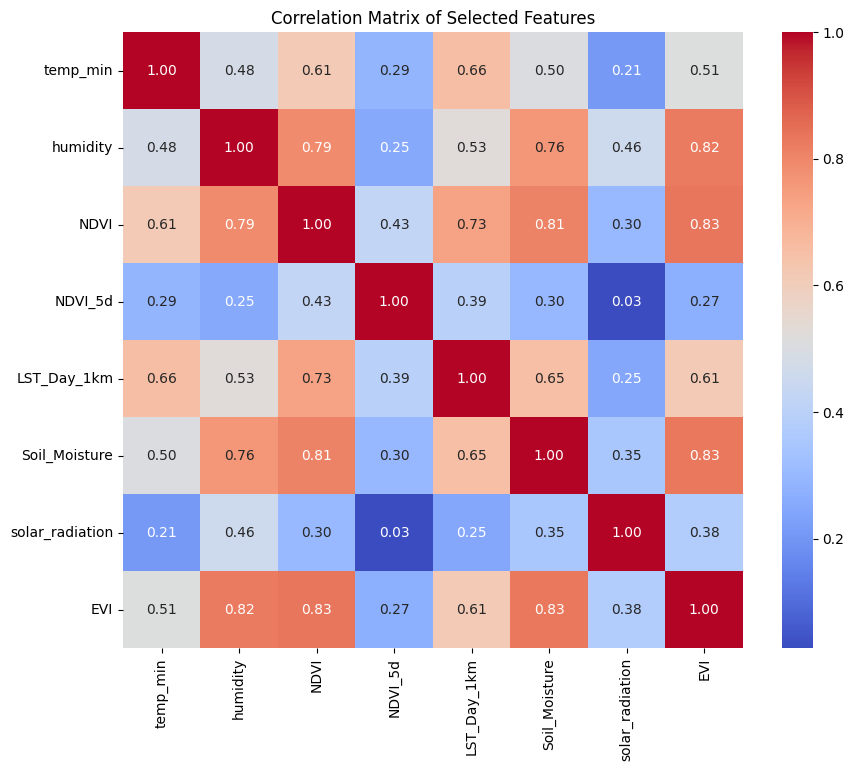


🔹 Final Selected Features After Removing Highly Correlated Variables:
['temp_min', 'humidity', 'NDVI', 'NDVI_5d', 'LST_Day_1km', 'Soil_Moisture', 'solar_radiation', 'EVI']

🔹 Final Model Performance:
✅ Test MSE: 8.7298
✅ Test R² Score: 0.3510

✅ Optimized Extra Trees model saved as 'optimized_extratrees_model.pkl'


In [932]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Step 1: Load Data
features = [
    "temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d",
    "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation",
    "wind_speed_10m", "wind_direction_10m", "wind_speed_50m", "wind_direction_50m", "EVI"
]
X = merged_df[features]
y = merged_df["ka_cases"]

# 🔹 Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 3: Feature Selection using Extra Trees
model = ExtraTreesRegressor(n_estimators=750, random_state=42)
model.fit(X_train, y_train)

# Get Feature Importance Scores
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# 🔹 Step 4: Select Features Above Median Importance
selector = SelectFromModel(model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get Selected Features
selected_features = X.columns[selector.get_support()]
print("\n🔹 Selected Features After Extra Trees:")
print(selected_features)

# 🔹 Step 5: Check Correlation to Remove Redundant Features
corr_matrix = X_train[selected_features].corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

# Drop one of the features if correlation > 0.85
threshold = 0.85
to_drop = set()
for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)):
        if corr_matrix.iloc[i, j] > threshold:
            to_drop.add(selected_features[j])

selected_features = [f for f in selected_features if f not in to_drop]
print("\n🔹 Final Selected Features After Removing Highly Correlated Variables:")
print(selected_features)

# 🔹 Step 6: Train Final Model
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

final_model = ExtraTreesRegressor(
    n_estimators=750, max_depth=30, min_samples_split=3, 
    min_samples_leaf=1, max_features='sqrt', bootstrap=False, random_state=42
)
final_model.fit(X_train_final, y_train)

# 🔹 Step 7: Evaluate Model
y_pred = final_model.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🔹 Final Model Performance:")
print(f"✅ Test MSE: {mse:.4f}")
print(f"✅ Test R² Score: {r2:.4f}")

# 🔹 Step 8: Save Final Model
joblib.dump(final_model, "optimized_extratrees_model.pkl")
print("\n✅ Optimized Extra Trees model saved as 'optimized_extratrees_model.pkl'")


<positron-console-cell-933>:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



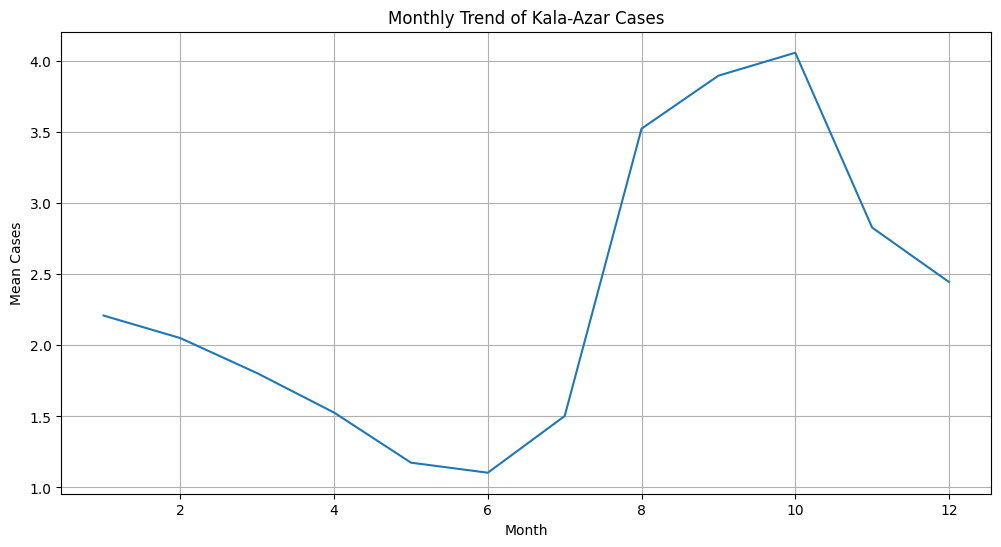


✅ Temporal Feature Engineering Complete! Dataset Ready for Modeling.
✅ Processed dataset saved as 'processed_features_with_temporal.csv'


In [933]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Ensure 'date' Column is in Datetime Format
merged_df["date"] = pd.to_datetime(merged_df["date"])

# 🔹 Step 2: Extract Temporal Features
merged_df["Year"] = merged_df["date"].dt.year
merged_df["Month"] = merged_df["date"].dt.month
merged_df["Week"] = merged_df["date"].dt.isocalendar().week
merged_df["DayOfYear"] = merged_df["date"].dt.dayofyear
merged_df["DayOfWeek"] = merged_df["date"].dt.dayofweek  # Monday=0, Sunday=6

# 🔹 Step 3: Encode Seasonal Features
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

merged_df["Season"] = merged_df["Month"].apply(assign_season)
merged_df = pd.get_dummies(merged_df, columns=["Season"], drop_first=True)  # One-hot encode seasons

# 🔹 Step 4: Encode Cyclical Features (Sine/Cosine Transformation)
merged_df["Month_sin"] = np.sin(2 * np.pi * merged_df["Month"] / 12)
merged_df["Month_cos"] = np.cos(2 * np.pi * merged_df["Month"] / 12)
merged_df["DayOfYear_sin"] = np.sin(2 * np.pi * merged_df["DayOfYear"] / 365)
merged_df["DayOfYear_cos"] = np.cos(2 * np.pi * merged_df["DayOfYear"] / 365)

# 🔹 Step 5: Visualize Temporal Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x="Month", y="ka_cases", estimator="mean", ci=None)
plt.title("Monthly Trend of Kala-Azar Cases")
plt.xlabel("Month")
plt.ylabel("Mean Cases")
plt.grid()
plt.show()

# 🔹 Step 6: Train-Test Split with Temporal Features
features = [
    "temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d",
    "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation",
    "wind_speed_10m", "wind_direction_10m", "wind_speed_50m", "wind_direction_50m", "EVI",
    "Year", "Month", "Week", "DayOfYear", "DayOfWeek", 
    "Month_sin", "Month_cos", "DayOfYear_sin", "DayOfYear_cos"
] + [col for col in merged_df.columns if col.startswith("Season_")]

X = merged_df[features]
y = merged_df["ka_cases"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Temporal Feature Engineering Complete! Dataset Ready for Modeling.")


X.to_csv("processed_features_with_temporal.csv", index=False)
y.to_csv("target_ka_cases.csv", index=False)
print("✅ Processed dataset saved as 'processed_features_with_temporal.csv'")



In [934]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load updated dataset
x = pd.read_csv("processed_features_with_temporal.csv")
y = merged_df["ka_cases"]

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Extra Trees Model
extra_trees = ExtraTreesRegressor(n_estimators=750, max_depth=30, min_samples_split=3, 
                                  min_samples_leaf=1, max_features='sqrt', bootstrap=False, random_state=42)
extra_trees.fit(X_train, y_train)

# Predictions
y_pred = extra_trees.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")

# Save the model
joblib.dump(extra_trees, "best_extratrees_model.pkl")
print("✅ Extra Trees Model Trained & Saved as best_extratrees_model.pkl")




Test MSE: 5.2761
Test R² Score: 0.6078
✅ Extra Trees Model Trained & Saved as best_extratrees_model.pkl


In [935]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Initialize model
extra_trees = ExtraTreesRegressor(random_state=42, n_jobs=-1)

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(
    estimator=extra_trees,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Optimizing for R² score
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit model on training data
random_search.fit(X_train, y_train)

# Best parameters & model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Save best model
joblib.dump(best_model, "best_extratrees_model_optimized.pkl")

# Evaluate on test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Best Parameters: {best_params}")
print(f"📊 Optimized Test MSE: {mse:.4f}")
print(f"📈 Optimized Test R² Score: {r2:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
📊 Optimized Test MSE: 4.1261
📈 Optimized Test R² Score: 0.6933


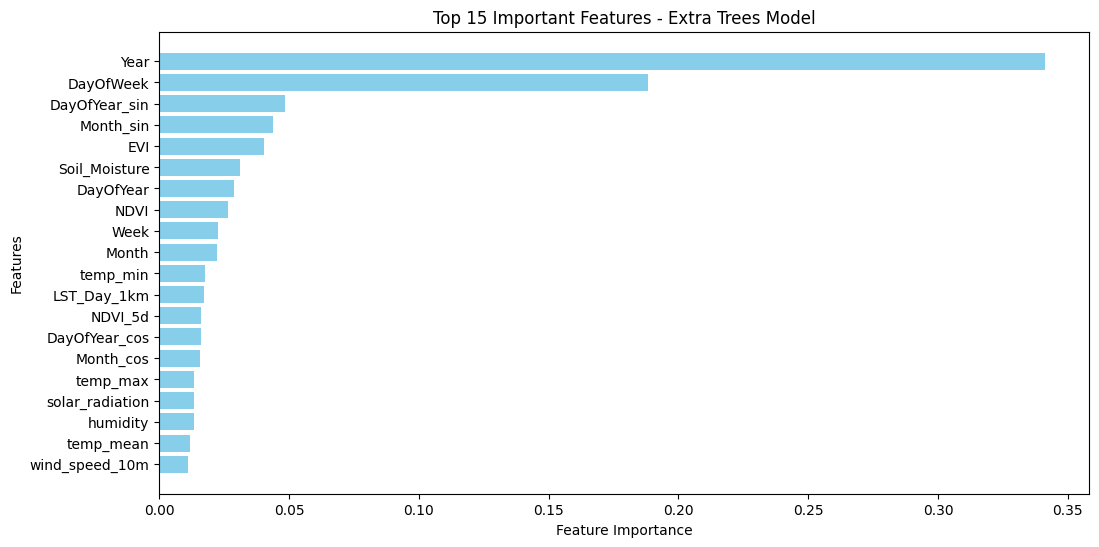

In [936]:
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load the saved model
best_extratrees_model = joblib.load("best_extratrees_model_optimized.pkl")


# Get feature importances
feature_importances = best_extratrees_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:20], sorted_importances[:20], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Important Features - Extra Trees Model")
plt.gca().invert_yaxis()
plt.show()


K means clustering 

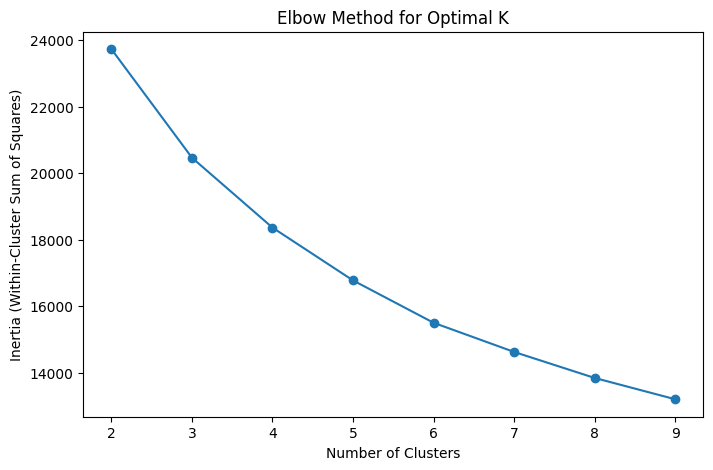

✅ Clustering Complete! New Features Added to Dataset.


In [937]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = merged_df[["temp_mean", "temp_min", "temp_max", "humidity", "NDVI", "NDVI_5d",
    "Precipitation", "SPI", "LST_Day_1km", "Soil_Moisture", "solar_radiation",
    "wind_speed_10m", "wind_direction_10m", "wind_speed_50m", "wind_direction_50m", "EVI"]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means with the best K (choose based on elbow plot)
optimal_k = 4  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
merged_df["Cluster"] = kmeans.fit_predict(scaled_features)

# Convert Cluster into a categorical variable
merged_df = pd.get_dummies(merged_df, columns=["Cluster"], drop_first=True)

print("✅ Clustering Complete! New Features Added to Dataset.")


In [938]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load data (Assuming X and y are defined)
# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Extra Trees Model
best_params = {
    "n_estimators": 750,
    "max_depth": 30,
    "min_samples_split": 3,
    "min_samples_leaf": 1,
    "max_features": "sqrt",
    "bootstrap": False,
}
model = ExtraTreesRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")

# Save Model and PCA
joblib.dump(model, "best_extratrees_pca_model.pkl")
joblib.dump(pca, "pca_transform.pkl")
joblib.dump(scaler, "scaler.pkl")

print("PCA-transformed Extra Trees model saved as best_extratrees_pca_model.pkl")


Test MSE: 7.0312
Test R² Score: 0.4773
PCA-transformed Extra Trees model saved as best_extratrees_pca_model.pkl


# Tune Xgboost 

In [939]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor  
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your feature set

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define better performing models
models = {
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),  
    "LGBM": LGBMRegressor()  
}

# Define hyperparameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Extra Trees": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 4, 5],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 4, 5],
        "min_child_weight": [1, 3, 5],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },
    "CatBoost": {
        "iterations": [50, 100, 200],
        "learning_rate": [0.05, 0.1, 0.2],
        "depth": [4, 6, 8],
        "l2_leaf_reg": [1, 3, 5]
    },
    "LGBM": {  # ✅ Added hyperparameter grid for LGBM
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [-1, 5, 10],  # -1 means no limit
        "num_leaves": [20, 31, 40],
        "min_child_samples": [5, 10, 20]
    }
}

# Store model results
results = []
best_models = {}

# Perform Randomized Search for each model
for name, model in models.items():
    print(f"🔍 Optimizing {name}...")

    if name in param_grids and param_grids[name]:  # Skip tuning Bayesian Ridge
        search = RandomizedSearchCV(
            model, param_distributions=param_grids[name], 
            n_iter=10, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, random_state=42
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model
        best_params = "Default"

    # Store best model
    best_models[name] = best_model

    # Evaluate optimized model on the test set
    y_pred = best_model.predict(X_test)
    mse = np.mean((y_test - y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Best Parameters": best_params,
        "Optimized MSE": mse,
        "Optimized RMSE": rmse,
        "r2": r2
    })

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display results
print("\n🏆 Model Performance Comparison:")
print(results_df)


🔍 Optimizing Random Forest...
🔍 Optimizing Extra Trees...
🔍 Optimizing Gradient Boosting...
🔍 Optimizing XGBoost...
🔍 Optimizing CatBoost...
🔍 Optimizing LGBM...


/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4691
[LightGBM] [Info] Number of data points in the train set: 1905, number of used features: 28
[LightGBM] [Info] Start training from score 2.345932

🏆 Model Performance Comparison:
               Model                                    Best Parameters  Optimized MSE  Optimized RMSE        r2
0      Random Forest  {'n_estimators': 100, 'min_samples_split': 2, ...       4.425990        2.103804  0.670962
1        Extra Trees  {'n_estimators': 200, 'min_samples_split': 5, ...       4.072417        2.018023  0.697248
2  Gradient Boosting  {'n_estimators': 200, 'min_samples_split': 10,...       4.421899        2.102831  0.671267
3            XGBoost  {'subsample': 0.8, 'n_estimators': 100, 'min_c...       4.663118        2.159425  0.653334
4           CatBoost  {'learning_rate': 0.1, 'l2_leaf_reg': 5

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Refined Version with Feature Importance & Model Saving

In [940]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your feature set

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define better performing models
models = {
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Extra Trees": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),  
    "LGBM": LGBMRegressor()  
}

# Define hyperparameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Extra Trees": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "min_child_weight": [1, 3, 5],
        "subsample": [0.7, 0.9, 1.0],
        "colsample_bytree": [0.7, 0.9, 1.0]
    },
    "CatBoost": {
        "iterations": [100, 200, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "depth": [4, 6, 8],
        "l2_leaf_reg": [1, 3, 5]
    },
    "LGBM": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [-1, 5, 10],  # -1 means no limit
        "num_leaves": [20, 31, 40],
        "min_child_samples": [5, 10, 20]
    }
}

# Store model results
results = []
best_models = {}

# Perform Randomized Search for each model
for name, model in models.items():
    print(f"🔍 Optimizing {name}...")

    if name in param_grids and param_grids[name]:
        search = RandomizedSearchCV(
            model, param_distributions=param_grids[name], 
            n_iter=50, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, random_state=42
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model
        best_params = "Default"

    # Store best model
    best_models[name] = best_model
    joblib.dump(best_model, f"best_{name.replace(' ', '_').lower()}_model.pkl")  # Save model

    # Evaluate optimized model on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Best Parameters": best_params,
        "Optimized MSE": mse,
        "Optimized RMSE": rmse,
        "r2": r2
    })

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display results
print("\n🏆 Model Performance Comparison:")
print(results_df)

# Feature Importance (for tree-based models)
feature_importance_df = pd.DataFrame({"Feature": X.columns})  # Assuming X is a DataFrame

for name, model in best_models.items():
    if hasattr(model, "feature_importances_"):
        feature_importance_df[name] = model.feature_importances_

print("\n📌 Feature Importance Analysis:")
print(feature_importance_df.sort_values(by="XGBoost", ascending=False))  # Sort by XGBoost importance


🔍 Optimizing Random Forest...
🔍 Optimizing Extra Trees...
🔍 Optimizing Gradient Boosting...
🔍 Optimizing XGBoost...
🔍 Optimizing CatBoost...
🔍 Optimizing LGBM...


/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=lo

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=20, max_features=Non

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_fe

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_featu

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4708
[LightGBM] [Info] Number of data points in the train set: 1524, number of used features: 28
[LightGBM] [Info] Start training from score 2.379265
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4704
[LightGBM] [Info] Number of data points in the train set: 1524, number of used features: 28
[LightGBM] [Info] Start training from score 2.393701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4691
[LightGBM] [Info] Number of data points in the train set: 1905, number of used features: 28
[LightGBM] [Info] Start training from score 2.345932


/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🏆 Model Performance Comparison:
               Model                                    Best Parameters  Optimized MSE  Optimized RMSE        r2
0      Random Forest  {'n_estimators': 100, 'min_samples_split': 10,...       4.378815        2.092562  0.674470
1        Extra Trees  {'n_estimators': 300, 'min_samples_split': 5, ...       4.038716        2.009656  0.699753
2  Gradient Boosting  {'n_estimators': 200, 'min_samples_split': 2, ...       4.532844        2.129048  0.663019
3            XGBoost  {'subsample': 0.7, 'n_estimators': 300, 'min_c...       4.583204        2.140842  0.659275
4           CatBoost  {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iter...       4.532673        2.129007  0.663031
5               LGBM  {'num_leaves': 20, 'n_estimators': 100, 'min_c...       4.654060        2.157327  0.654007

📌 Feature Importance Analysis:
               Feature  Random Forest  Extra Trees  Gradient Boosting   XGBoost   CatBoost  LGBM
21           Month_sin       0.044043     0.046


📊 SHAP Analysis for Best Model: Extra Trees


 96%|=================== | 456/477 [00:18<00:00]       

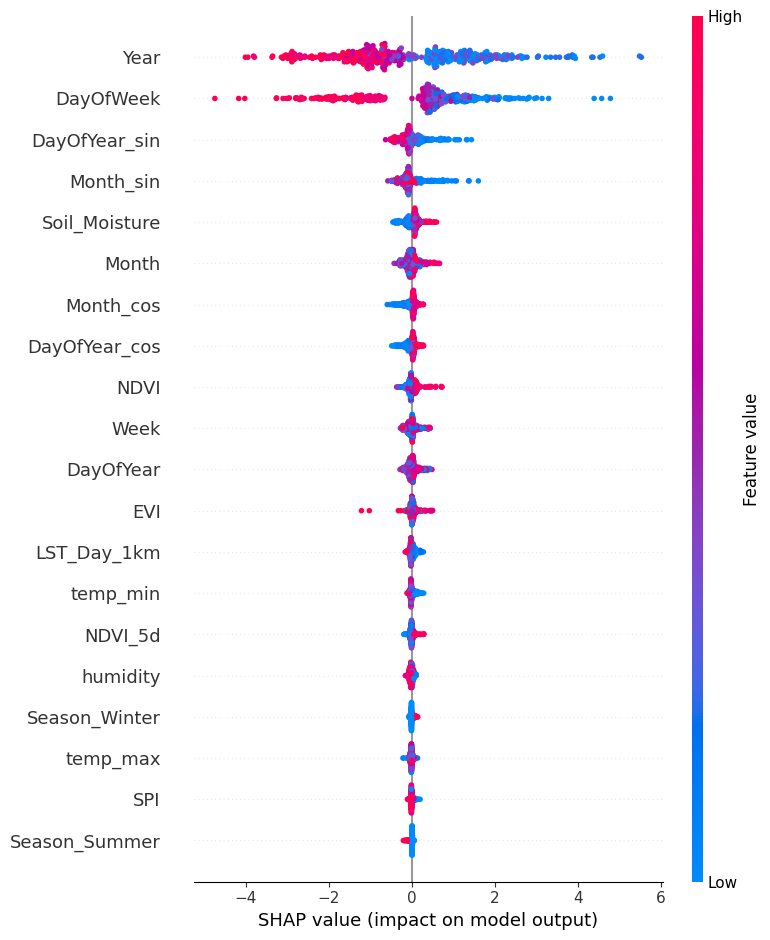

In [941]:
import shap
import matplotlib.pyplot as plt

# Select the best-performing model based on R² or RMSE
best_model_name = results_df.sort_values(by="r2", ascending=False).iloc[0]["Model"]
best_model = best_models[best_model_name]

print(f"\n📊 SHAP Analysis for Best Model: {best_model_name}")

# Compute SHAP values
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Summary plot (Feature Importance)
plt.figure(figsize=(10, 2))
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


# 🔹 Optional: SHAP Dependence Plot

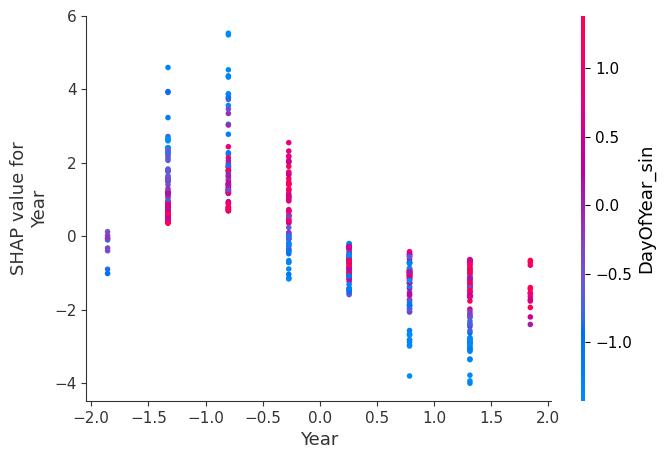

In [942]:
# Find the most important feature
top_feature = X.columns[np.argmax(np.abs(shap_values.values).mean(axis=0))]

# Dependence plot
shap.dependence_plot(top_feature, shap_values.values, X_test, feature_names=X.columns)


# Predicted versus actual cases 

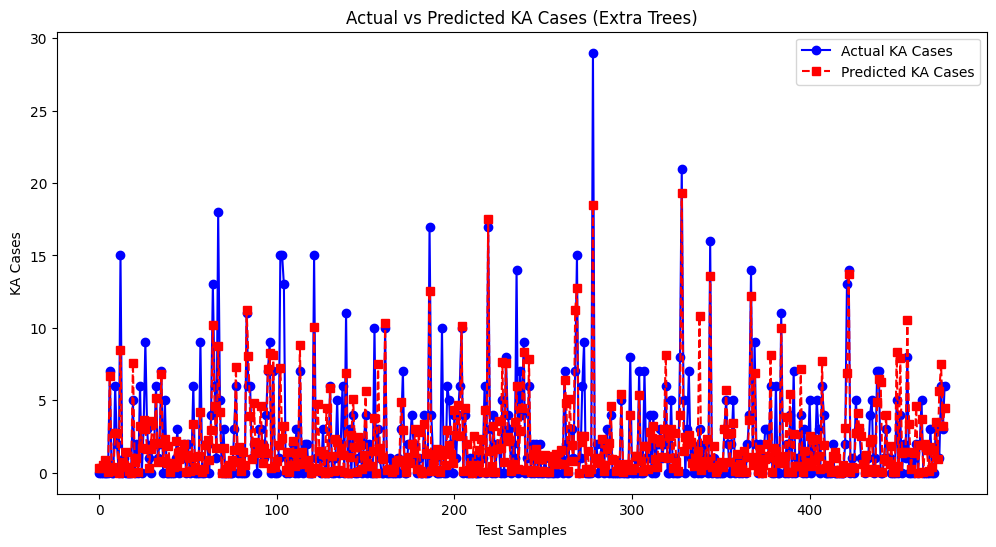

In [943]:
# Predicted case and the actual cases
best_model_name = results_df.sort_values(by="Optimized RMSE").iloc[0]["Model"]  # Choose the model with lowest RMSE
best_model = best_models[best_model_name]

y_pred = best_model.predict(X_test)  # Predict using the best model

plt.figure(figsize=(12, 6))

# Plot Actual KA Cases
plt.plot(y_test.values, label="Actual KA Cases", linestyle="-", marker="o", color="blue")

# Plot Model Predictions
plt.plot(y_pred, label="Predicted KA Cases", linestyle="--", marker="s", color="red")

# Customize plot
plt.xlabel("Test Samples")
plt.ylabel("KA Cases")
plt.title(f"Actual vs Predicted KA Cases ({best_model_name})")
plt.legend()
plt.show()


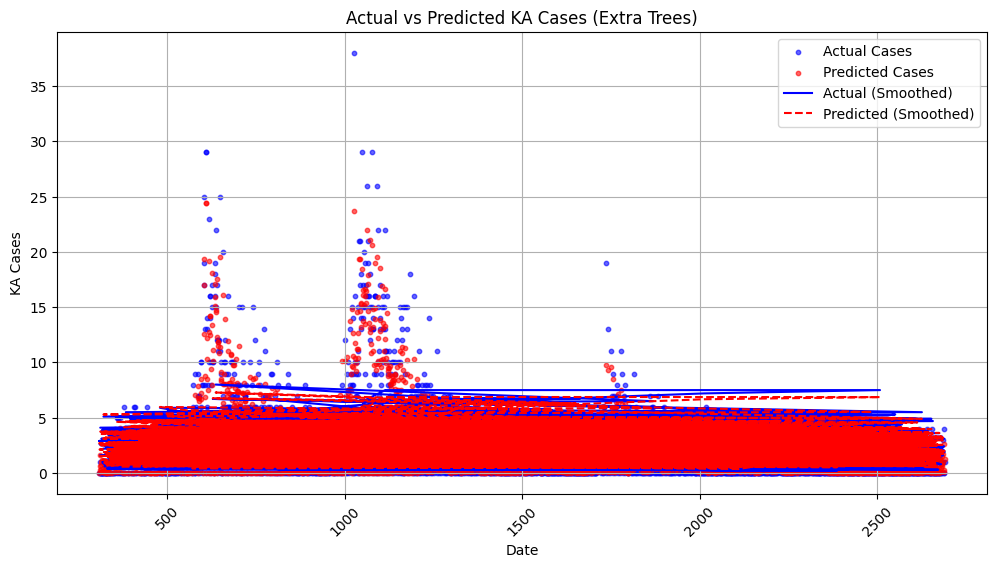

In [944]:
import matplotlib.pyplot as plt
import pandas as pd

# Get best model
best_model_name = results_df.sort_values(by="Optimized RMSE").iloc[0]["Model"]
best_model = best_models[best_model_name]

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Combine actual and predicted values
y_actual = pd.concat([y_train, y_test])
y_predicted = pd.concat([
    pd.Series(y_train_pred, index=y_train.index),
    pd.Series(y_test_pred, index=y_test.index)
])

plt.figure(figsize=(12, 6))

# Scatter plot for better readability
plt.scatter(y_actual.index, y_actual.values, label="Actual Cases", color="blue", alpha=0.6, s=10)
plt.scatter(y_predicted.index, y_predicted.values, label="Predicted Cases", color="red", alpha=0.6, s=10)

# Rolling average for smoother trends
y_actual_smooth = y_actual.rolling(window=10).mean()
y_predicted_smooth = y_predicted.rolling(window=10).mean()
plt.plot(y_actual_smooth, color="blue", linestyle="-", linewidth=1.5, label="Actual (Smoothed)")
plt.plot(y_predicted_smooth, color="red", linestyle="--", linewidth=1.5, label="Predicted (Smoothed)")

# Customize plot
plt.xlabel("Date")
plt.ylabel("KA Cases")
plt.title(f"Actual vs Predicted KA Cases ({best_model_name})")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


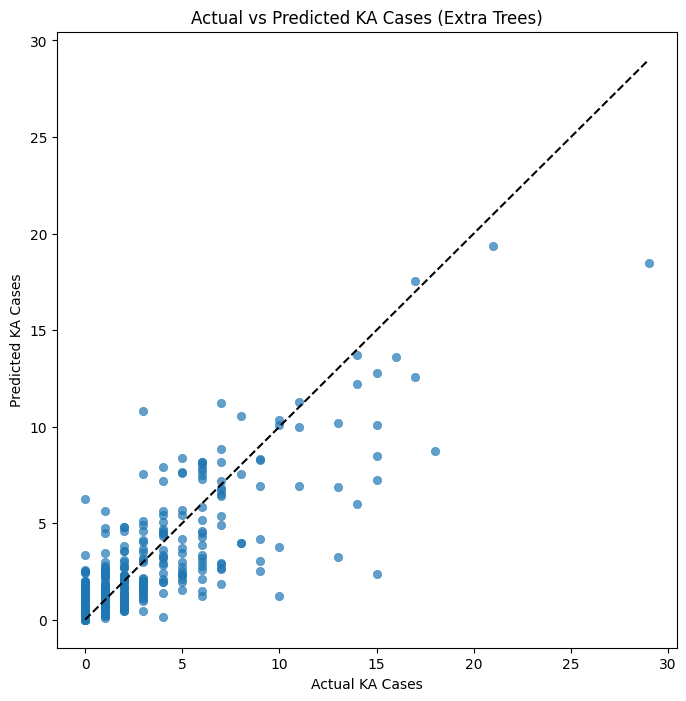

In [945]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--")  # Ideal line

plt.xlabel("Actual KA Cases")
plt.ylabel("Predicted KA Cases")
plt.title(f"Actual vs Predicted KA Cases ({best_model_name})")
plt.show()
